<a href="https://colab.research.google.com/github/comodoro180/ICESI_MCD/blob/main/Examex1_Analisis_Cuantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis cuantiativo - Examen 1

Participantes:
- Rodrigo Escallon
- Nicolas Garcia
- Juan Perez
- Carlos Hoyos
---



# Ejercicio 1

Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.

## Primera parte

Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de re-
gresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

In [1]:
# Importar Librerías y cargue de archivo
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from statsmodels.stats.stattools import durbin_watson

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR) # Para no mostrar mensajes Warning

# 1. Cargue por Colab
from google.colab import drive
drive.mount('/content/drive')
data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analisis_Cuantitativo/AnalisisCuantitativo_Taller1/data_exam1.xlsx', sheet_name='data1')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                 Y            X        Ind
count  1000.000000  1000.000000  1000.0000
mean     46.953751     9.976858     0.2000
std      22.046143     3.762567     0.4002
min     -34.894319    -4.263757     0.0000
25%      32.427643     7.638899     0.0000
50%      45.460252     9.952888     0.0000
75%      61.587567    12.379984     0.0000
max     135.542574    25.628678     1.0000


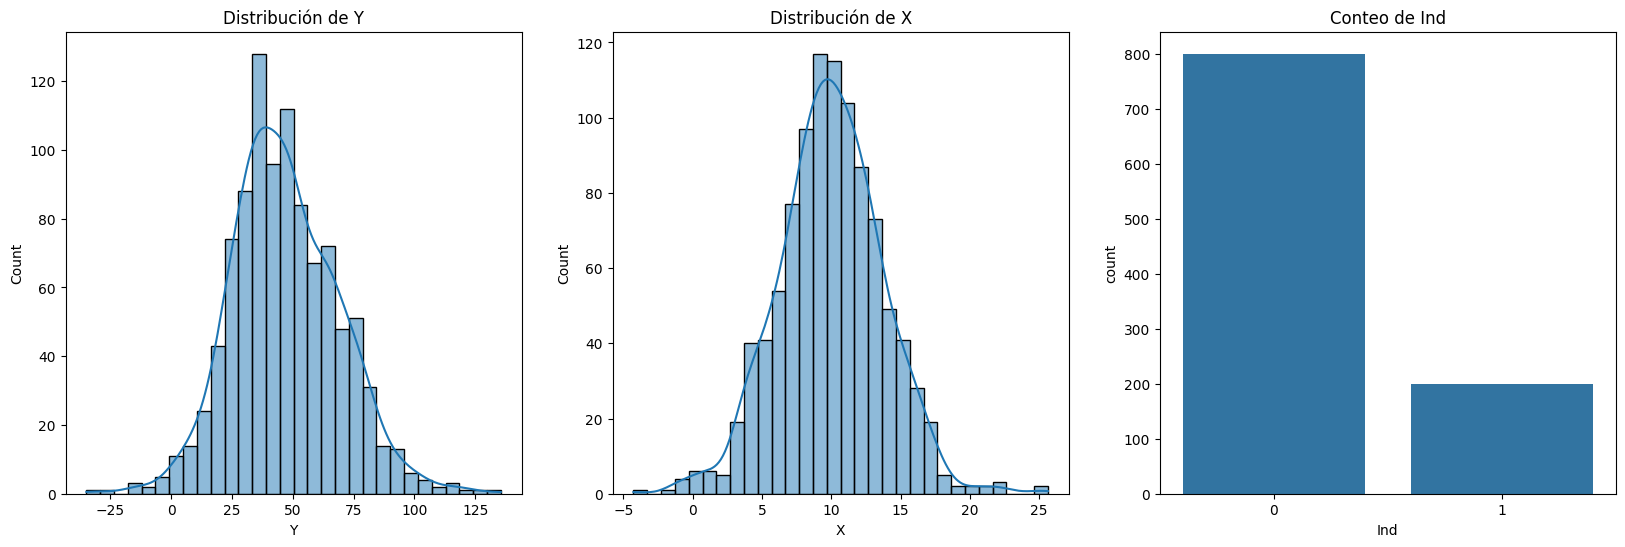

In [2]:
# Análisis descriptivo
descriptive_stats = data1.describe()
print(descriptive_stats)

# Visualización de la distribución de las variables
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Histogramas
sns.histplot(data1['Y'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Y')

sns.histplot(data1['X'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribución de X')

# Conteo de la variable categórica Ind
sns.countplot(x='Ind', data=data1, ax=axes[2])
axes[2].set_title('Conteo de Ind')

plt.show()

Del análisis exporatorio del Dataframe se puede decir que:

- El dataframe cuenta con 1000 registros.
- La media de la variable dependiente Y es de 46.95, mientras que la de X es de 9.98.
- Las variables Y y X tienen distribuciones casi normales, aunque Y tiene una mayor dispersión en los valores por su forma de campana un poco más ancha.
- Existe una variable categórica denominada Ind que cambia entre 0 y 1, el 20% de los datos tiene valor de 1.


_Procedemos a cruzar variables y a realizar un diagrama de BoxPlot para revisar outliers y dispersión_

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


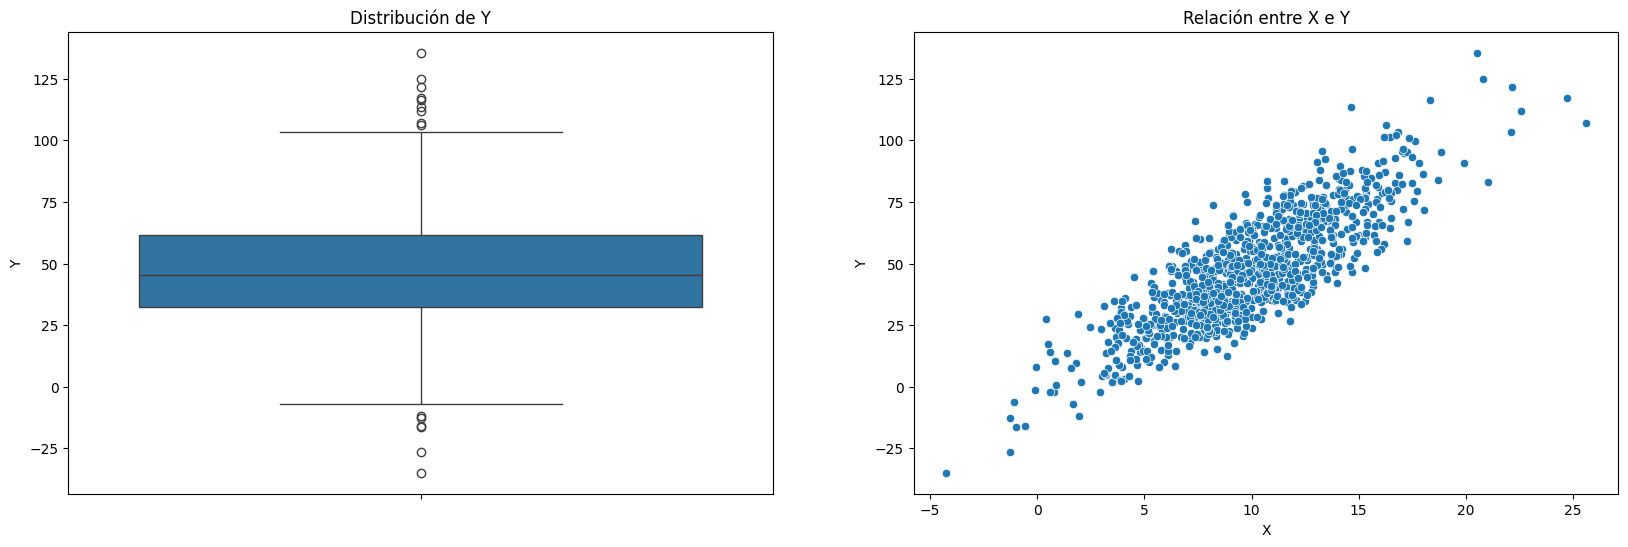

Número de outliers en la variable Y: 15


In [3]:
# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot para observar la distribución de Y
sns.boxplot(ax=axes[0], y='Y', data=data1)
axes[0].set_title('Distribución de Y')

# Scatter plot de Y vs X
sns.scatterplot(ax=axes[1], x='X', y='Y', data=data1)
axes[1].set_title('Relación entre X e Y')

plt.show()

# Calcular el rango intercuartílico (IQR)
Q1 = data1['Y'].quantile(0.25)
Q3 = data1['Y'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y contar outliers
outliers = data1[(data1['Y'] < lower_bound) | (data1['Y'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f'Número de outliers en la variable Y: {num_outliers}')

Podemos observar que existen 15 puntos que están por fuera del rango intercuartil, 15 puntos que no son significativos de la muestra, por lo que procedemos a eliminarlos del dataframe original.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


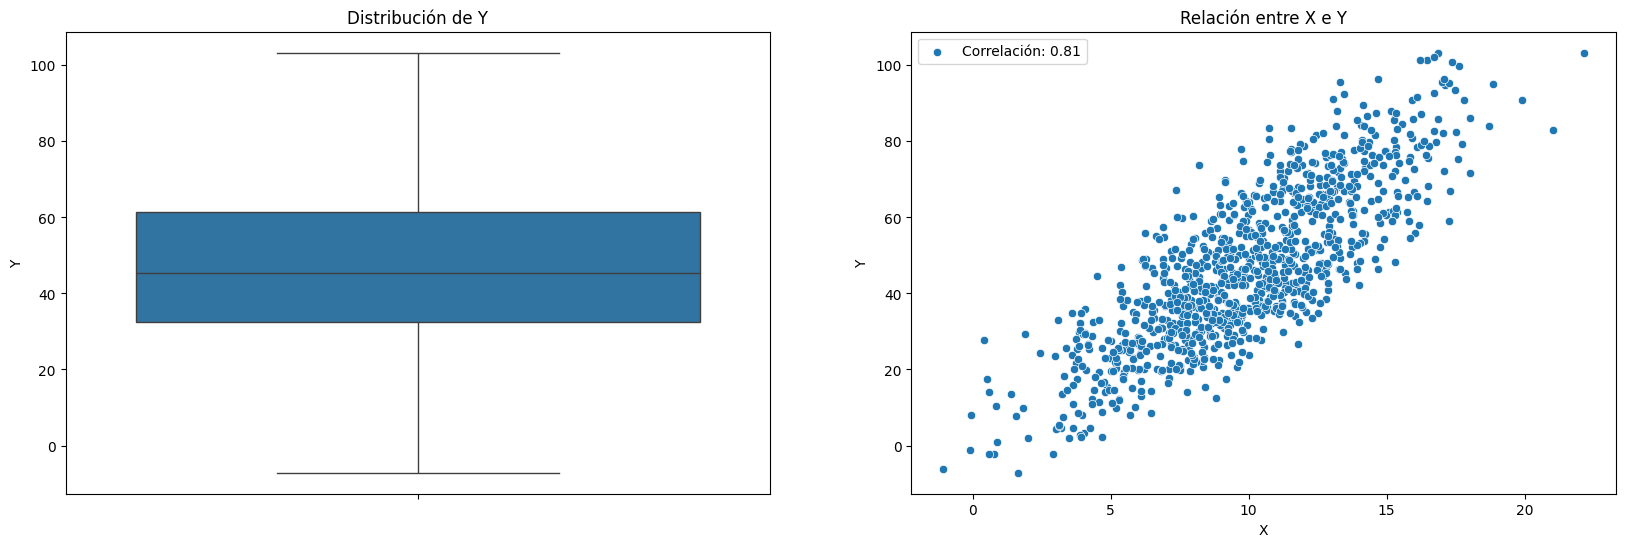

Y           X         Ind
count  985.000000  985.000000  985.000000
mean    46.718472    9.946817    0.203046
std     20.496121    3.529714    0.402471
min     -7.153930   -1.063922    0.000000
25%     32.497204    7.656245    0.000000
50%     45.379886    9.921362    0.000000
75%     61.319076   12.301068    0.000000
max    103.318957   22.129633    1.000000

In [4]:
# Filtrar el dataframe para eliminar los outliers
data1_sin_outliers = data1.copy()
data1_sin_outliers = data1_sin_outliers[(data1_sin_outliers['Y'] >= lower_bound) & (data1_sin_outliers['Y'] <= upper_bound)]

# Calcular la correlación entre Y y X
correlation = data1_sin_outliers['Y'].corr(data1_sin_outliers['X'])

# Volver a graficar nuevo dataframe
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax=axes[0], y='Y', data=data1_sin_outliers)
axes[0].set_title('Distribución de Y')

# Scatter plot de Y vs X
sns.scatterplot(ax=axes[1], x='X', y='Y', data=data1_sin_outliers)
axes[1].set_title('Relación entre X e Y')
axes[1].legend([f'Correlación: {correlation:.2f}'])

plt.show()
data1_sin_outliers.describe()

_El análisis exploratorio revela lo siguiente:_

- **Diagrama de caja para la variable Y:** En el gráfico **izquierdo** se muestra la distribución de la variable Y. Se observa que la mediana está en torno a 46, sin datos atípicos (outliers).

- **Gráfico de dispersión X e Y,**: El gráfico **derecho** se muestra una clara relación positiva entre X y Y (Forma elíptica creciente). A medida que X aumenta, también lo hace Y, lo cual demuestra que existe una correlación lineal entre estas dos variables, la cual se calcula y se muestra en la leyenda del gráfico con un valor de 0.81 (_correlación positiva alta_). La densidad de puntos parece concentrarse en una banda relativamente estrecha, lo que indica que es razonable suponer que una relación lineal puede describir bien el comportamiento de los datos.

La relación que se observa en el gráfico de dispersión, donde Y aumenta de manera proporcional a X, es un indicador clave de que un modelo de regresión lineal es apropiado. La presencia de una relación lineal entre estas variables sugiere que podemos modelar Y como  una función lineal de X.

### **Modelo de regresión sin interacción**

In [5]:
# Definir el modelo de regresión lineal con la variable categórica 'Ind' sin interacción
model = smf.ols('Y ~ X + C(Ind)', data=data1_sin_outliers).fit()

# Mostrar el resumen del modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1350.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.40e-282
Time:                        00:46:41   Log-Likelihood:                -3721.1
No. Observations:                 985   AIC:                             7448.
Df Residuals:                     982   BIC:                             7463.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2810      1.020      2.237      

**Ecuación del modelo de regresión:** La fórmula del modelo de regresión lineal es:

$$
Y = 2.2810 + 4.7550X - 14.0822 \cdot C(Ind)
$$


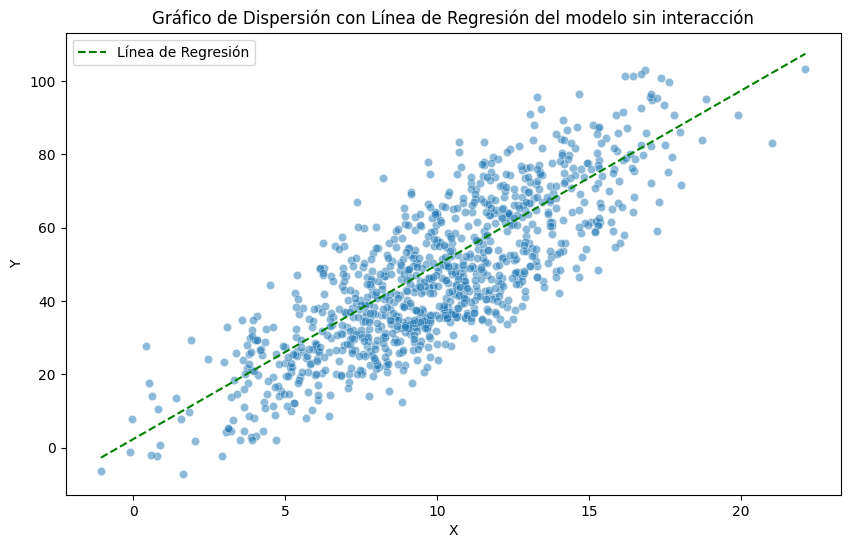

In [6]:
# Gráfico de Dispersión con Línea de Regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=data1_sin_outliers, alpha=0.5)
x_vals = np.linspace(data1_sin_outliers['X'].min(), data1_sin_outliers['X'].max(), 100)
y_vals = model.params['Intercept'] + model.params['X'] * x_vals
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Línea de Regresión')
plt.title('Gráfico de Dispersión con Línea de Regresión del modelo sin interacción')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrar el gráfico
plt.show()

_El modelo de regresión lineal generado para la variable dependiente Y con los predictores X y la variable categórica Ind (sin interacción) presenta los siguientes resultados:_

- **Coeficientes:**

    - El intercepto (valor de Y cuando X = 0 y "Ind" = 0) es aproximadamente 2.28, pero no es estadísticamente significativo (p-valor = 0.026).

    - El coeficiente de X es 4.755, lo que significa que por cada unidad de aumento en X, Y aumenta en promedio en 4.755, y este coeficiente es altamente significativo (p-valor < 0.001).
    - El coeficiente de Ind (para la categoría "Ind = 1") es -14.082, lo que indica que cuando "Ind" es 1, el valor de Y es, en promedio, 14.082 unidades menor que cuando "Ind" es 0, siendo este resultado también muy significativo (p-valor < 0.001).

- **R-cuadrado:** El R² es de 0.733, lo que indica que el 73.3% de la variabilidad de Y está explicada por el modelo.

**Conclusión:** _El modelo de regresión lineal con la variable categórica Ind y el predictor X es adecuado, ya que ambos predictores son significativos y explican una gran parte de la variabilidad de la variable dependiente Y_

## Segunda parte

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto
εi
iid∼ N(0, σ2
)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


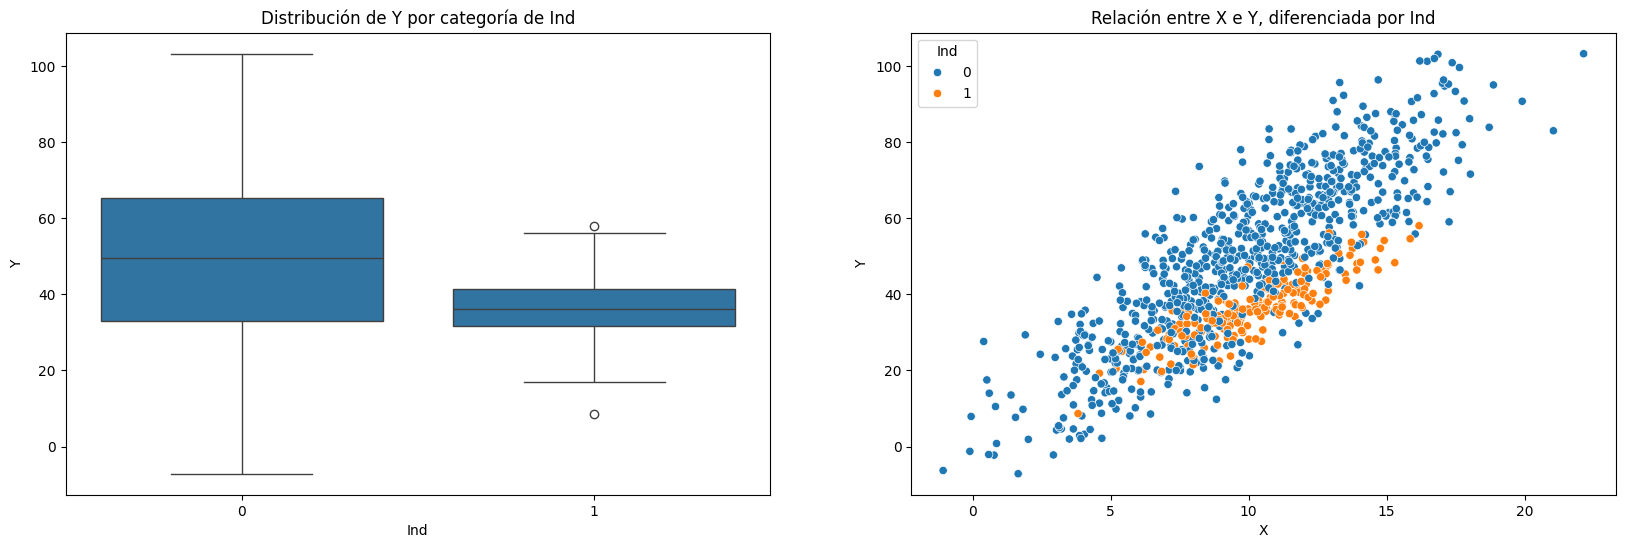

In [7]:
# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot para observar la distribución de Y basada en la variable categórica 'Ind'
sns.boxplot(ax=axes[0], x='Ind', y='Y', data=data1_sin_outliers)
axes[0].set_title('Distribución de Y por categoría de Ind')

# Scatter plot de Y vs X, coloreado por Ind
sns.scatterplot(ax=axes[1], x='X', y='Y', hue='Ind', data=data1_sin_outliers)
axes[1].set_title('Relación entre X e Y, diferenciada por Ind')

plt.show()

_El análisis exploratorio inicial revela lo siguiente:_

- **Diagrama de Caja de Y por categoría de Ind:** En el gráfico **izquierdo**  muestra la distribución de Y separada por la variable categórica Ind. Se observa una diferencia notable en las distribuciones. Para **_Ind igual 0_**, los valores de Y son considerablemente más altos, con una mediana cercana a 50. En cambio, para  **_Ind igual 1_**, los valores de Y son mucho más bajos, con una mediana cercana a 39. Esto sugiere que el nivel de la variable categórica tiene un impacto significativo en los valores de Y.

- **Gráfico de dispersión entre X e Y, diferenciados por categoría de Ind**: El gráfico **derecho** se observa la relación entre X e  Y, con los puntos diferenciados por el valor de Ind. Aunque ambas categorías muestran una tendencia positiva entre X e Y, parece haber una diferencia en las distribuciones de los puntos para los diferentes valores de Ind. Específicamente, los puntos naranjas(**_Ind igual 1_**) están más concentrados y con menores valores de Y, lo que indica una pequeña diferencia en la relación entre X e Y según la categoría Ind.

Aunque las pendientes no varían de una manera drástica con diferentes valores para Ind, un modelo con interacciones podría ser mas adecuado para capturar adecuadamente la relación dependiente entre estas variables. Este tipo de modelo refleja que el efecto de X sobre Y cambia en función del nivel de Ind, lo que se traduce en una relación más compleja y dinámica que un modelo lineal sin interacciones no podría captar correctamente.


### Modelo de regresión con interacción

In [8]:
# Crear variable de interacción entre X e Ind
data1_sin_outliers['X_Ind'] = data1_sin_outliers['X'] * data1_sin_outliers['Ind']

# Ajustar el modelo y revisar resultados
model = smf.ols('Y ~ X + Ind + X_Ind', data=data1_sin_outliers).fit()

# Get the summary of the model to interpret the results
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     929.2
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          4.25e-286
Time:                        00:46:42   Log-Likelihood:                -3709.2
No. Observations:                 985   AIC:                             7426.
Df Residuals:                     981   BIC:                             7446.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.046      0.881      0.3

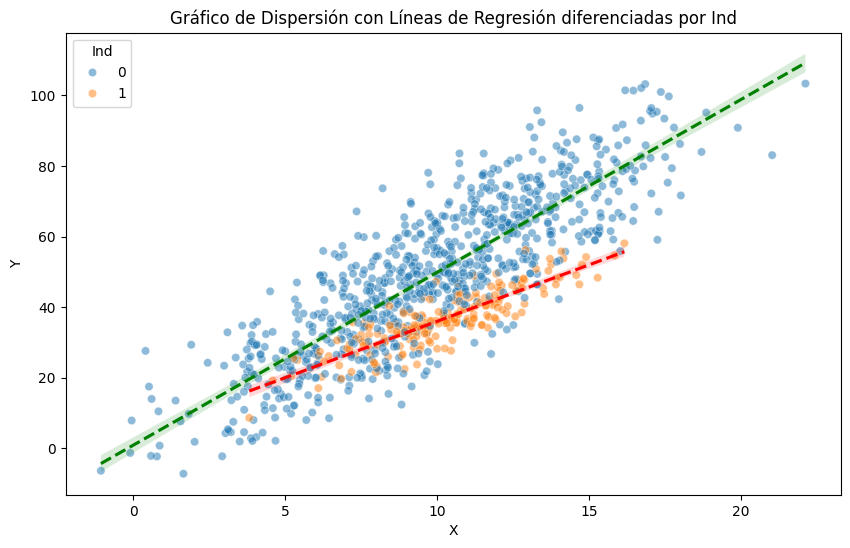

In [9]:
# Crear el gráfico de dispersión sin diferenciar por 'Ind'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='Ind', data=data1_sin_outliers, alpha=0.5)

# Añadir líneas de regresión para cada grupo en 'Ind'
for ind_value in data1_sin_outliers['Ind'].unique():
    subset = data1_sin_outliers[data1_sin_outliers['Ind'] == ind_value]
    sns.regplot(x='X', y='Y', data=subset, scatter=False,
                line_kws={'color': 'green' if ind_value == 0 else 'red', 'linestyle': '--'})

plt.title('Gráfico de Dispersión con Líneas de Regresión diferenciadas por Ind')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

_El modelo de regresión lineal generado para la variable dependiente Y con los predictores X y la variable categórica Ind (con interacción) presenta los siguientes resultados:_

- **Coeficientes:**
  - Intercepto: El valor de Y cuando X = 0 e "Ind" = 0 es aproximadamente 0.92, pero no es estadísticamente significativo (p-valor = 0.378).
  - Coeficiente de X: El coeficiente de X es 4.892, lo que significa que por cada unidad de aumento en X, Y aumenta en promedio en 4.892 unidades. Este coeficiente es altamente significativo (p-valor < 0.001).
  - Coeficiente de Ind: Para la categoría "Ind = 1", el valor de Y es, en promedio, 3.126 unidades mayor que cuando "Ind" es 0, aunque este resultado no es estadísticamente significativo (p-valor = 0.387).
  - Coeficiente de la interacción X: La interacción entre X e Ind tiene un coeficiente de -1.679, lo que indica que, cuando Ind = 1, el aumento en Y por cada unidad de X es, en promedio, 1.679 unidades menor comparado con el grupo de referencia (Ind = 0). Este coeficiente es altamente significativo (p-valor < 0.001).
- **R-cuadrado:** El R² es de 0.740, lo que indica que el 74% de la variabilidad de Y está explicada por el modelo con interacción.

**Conclusión:** El modelo de regresión lineal con interacción es levemente mejor en términos de ajuste, ya que el R² del modelo con interacción (0.740) es mayor que el del modelo sin interacción (0.733). Además, la inclusión de la interacción X es significativa (p-valor < 0.001), lo que sugiere que hay un efecto combinado entre X e Ind en la variable dependiente Y. Por lo tanto, el modelo con interacción sería preferible para capturar correctamente esta relación.

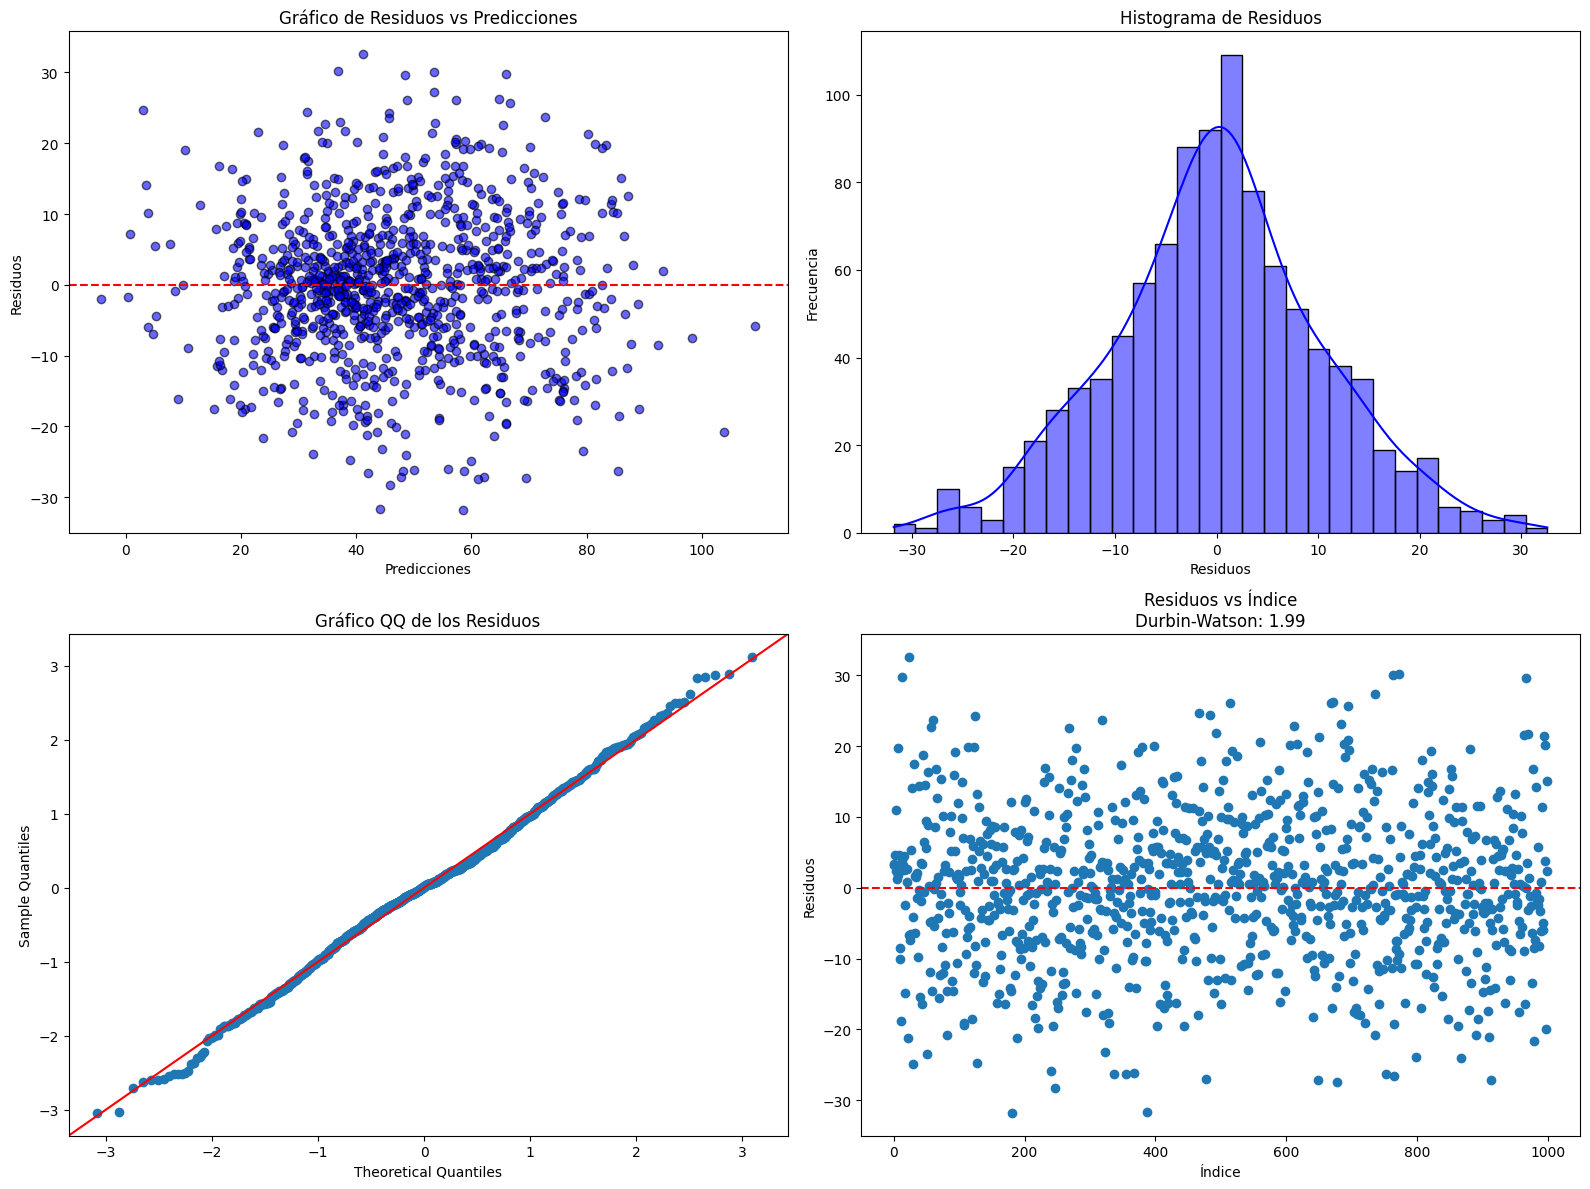

In [10]:
# Predicciones y residuos del modelo
predictions = model.fittedvalues
residuals = model.resid

# Calcular el estadístico de Durbin-Watson
dw_statistic = durbin_watson(residuals)

# Crear una figura con cuatro subplots en una matriz 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico de residuos vs predicciones
axes[0, 0].scatter(predictions, residuals, edgecolor='k', facecolor='blue', alpha=0.6)
axes[0, 0].axhline(0, color='red', linestyle='--')
axes[0, 0].set_title('Gráfico de Residuos vs Predicciones')
axes[0, 0].set_xlabel('Predicciones')
axes[0, 0].set_ylabel('Residuos')

# Histograma de residuos
sns.histplot(residuals, kde=True, color='blue', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Histograma de Residuos')
axes[0, 1].set_xlabel('Residuos')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico QQ para la normalidad de los residuos
sm.qqplot(residuals, line='45', fit=True, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico QQ de los Residuos')

# Gráfico de residuos vs índice (para validar independencia)
axes[1, 1].plot(residuals, marker='o', linestyle='none')
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title(f'Residuos vs Índice\nDurbin-Watson: {dw_statistic:.2f}')
axes[1, 1].set_xlabel('Índice')
axes[1, 1].set_ylabel('Residuos')

plt.tight_layout()
plt.show()

_El análisis de los supuestos del modelo con interacción muestra lo siguiente:_

- **Homoscedasticidad:** El gráfico de **residuos vs predicciones** muestra que los residuos se dispersan de manera razonablemente uniforme alrededor de 0, lo que indica que no hay una clara evidencia de heteroscedasticidad (variabilidad no constante de los residuos). Este es un buen indicio de que el supuesto de homoscedasticidad se cumple.

- **Normalidad de los residuos:**
    - El histograma sugiere que los residuos se distribuyen de manera cercana a una normal, lo cual es un buen indicio de que el supuesto de normalidad de los residuos se cumple, aunque con algunos pequeños outliers o valores extremos.

    - El QQ plot indica que los residuos siguen aproximadamente una distribución normal, aunque hay algunos pequeños desvíos en los extremos. Sin embargo, en general, el supuesto de normalidad parece cumplirse.

- **Independencia de los residuos:** El gráfico de residuos vs. índice muestra residuos distribuidos aleatoriamente alrededor de cero, también se muestra que el estadístico de Durbin-Watson es cercano a 2 (_también visto en la tabla resumen del modelo_), por lo tanto se concluye que hay evidencia de autocorrelación en los residuos.

En resumen, el modelo con interacción es más adecuado para capturar la relación entre Y, X, y Ind, y los supuestos del modelo se cumplen de manera razonable, lo que valida su uso.

# Ejericio 2

Considere el conjunto de datos “data2” del fichero data_exam1.xlsx.

De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior, proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modelo.

## Librerias usadas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import seaborn as sns

from google.colab import drive
from scipy.stats import pearsonr, ttest_1samp, shapiro, kstest, anderson, jarque_bera, probplot

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR) # Para no mostrar mensajes Warning

## Análisis exploratorio

In [12]:
drive.mount('/content/drive')
#Leyendo los datos de la hoja data2 del archivo data_exam1.xlsx
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analisis_Cuantitativo/AnalisisCuantitativo_Taller1/data_exam1.xlsx', sheet_name='data2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None


Se tiene una muestra de 1000 observaciones de las variables cuantitativas continuas X y Y sin datos nulos o faltantes.

In [14]:
pd.options.display.float_format = '{:.8f}'.format
df.describe()

Y             X
count 1000.00000000 1000.00000000
mean     9.44562174    0.07234805
std      3.90818911    0.09753985
min    -12.07323856    0.00000001
25%      7.41148639    0.00845042
50%     10.07213418    0.03655172
75%     12.08254616    0.09992523
max     17.83878837    0.93974651

A partir de las estadísticas descriptivas del conjunto de datos de las variables **X** y **Y**, se pueden extraer varias conclusiones clave:

### **Tendencia central y dispersión:**
   - La **media** de **X** es aproximadamente **0.072** y la de **Y** es **9.45**. Esto indica que los valores de **Y** tienden a ser más altos en promedio en comparación con **X**, lo cual sugiere que las dos variables están en diferentes escalas.
   - La **desviación estándar** de **X** es **0.0975**, mientras que la de **Y** es **3.91**. Esto muestra que **Y** presenta una mayor variabilidad en sus valores que **X**.
   
### **Distribución:**

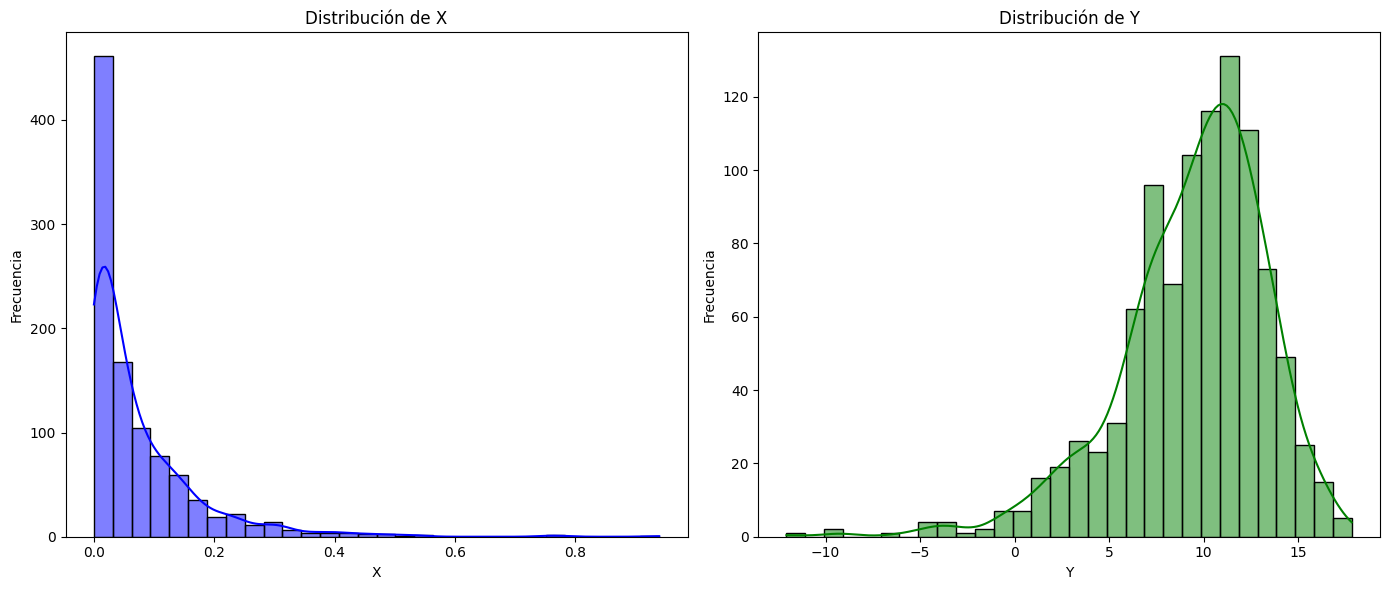

In [15]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 6))

# Subgráfico 1: Histograma para la distribución de X
plt.subplot(1, 2, 1)
sns.histplot(df['X'], bins=30, kde=True, color='blue')
plt.title('Distribución de X')
plt.xlabel('X')
plt.ylabel('Frecuencia')

# Subgráfico 2: Histograma para la distribución de Y
plt.subplot(1, 2, 2)
sns.histplot(df['Y'], bins=30, kde=True, color='green')
plt.title('Distribución de Y')
plt.xlabel('Y')
plt.ylabel('Frecuencia')

# Mostramos los gráficos
plt.tight_layout()
plt.show()

   - **X** no tiene valores negativos con un un valor mínimo cercano a **0** y un valor máximo de **0.9397**.
   - **Y** muestra una mayor variabilidad con valores que van desde **-12.07** hasta **17.83**. Esto podría implicar que algunos de los valores más extremos en **Y** son atípicos.
   - El hecho de que la **mediana** (percentil 50) y la **media** no sean iguales indica una posible asimetría (sesgo) en la distribución de las variables, especialmente en **Y**. Esto podría ser el resultado de los valores atípicos y podría sugerir una distribución no simétrica.

### **Valores atípicos:**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


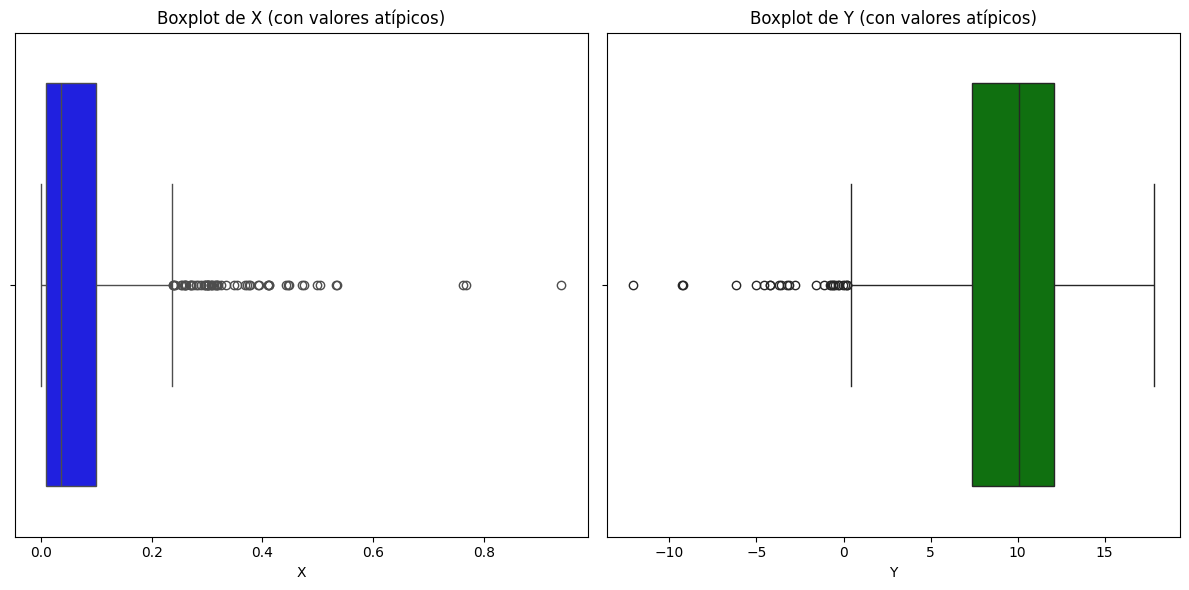

In [16]:
# Usaremos un gráfico de caja, que es útil para visualizar los valores atípicos (outliers).
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Subplot 1: Boxplot for X with outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='X', color='blue')
plt.title('Boxplot de X (con valores atípicos)')

# Subplot 2: Boxplot for Y with outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Y', color='green')
plt.title('Boxplot de Y (con valores atípicos)')

# Display the plots
plt.tight_layout()
plt.show()


In [17]:
# Para identificar valores atípicos, vamos a calcular el IQR (Rango Intercuartílico) y
# obtenemos los valores que se encuentran más allá de 1.5 veces el IQR desde el primer y tercer cuartil.
Q1_X = df['X'].quantile(0.25)
Q3_X = df['X'].quantile(0.75)
IQR_X = Q3_X - Q1_X

Q1_Y = df['Y'].quantile(0.25)
Q3_Y = df['Y'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

# Definiendo los rangos de X y Y
lower_bound_X = Q1_X - 1.5 * IQR_X
upper_bound_X = Q3_X + 1.5 * IQR_X

lower_bound_Y = Q1_Y - 1.5 * IQR_Y
upper_bound_Y = Q3_Y + 1.5 * IQR_Y

# Obteniendo los valores por fuera de los rangos
outliers_X = df[(df['X'] < lower_bound_X) | (df['X'] > upper_bound_X)]
outliers_Y = df[(df['Y'] < lower_bound_Y) | (df['Y'] > upper_bound_Y)]

outliers_X_count = outliers_X.shape[0]
outliers_Y_count = outliers_Y.shape[0]

pd.options.display.float_format = '{:.2f}'.format

print(f'Cantidad de valores atipicos de X : {outliers_X_count} que representan el {round((outliers_X_count/df.X.count()) * 100,2)} % de la muestra')
print(f'Cantidad de valores atipicos de Y : {outliers_Y_count} que representan el {round((outliers_Y_count/df.Y.count()) * 100,2)} % de la muestra')


Cantidad de valores atipicos de X : 59 que representan el 5.9 % de la muestra
Cantidad de valores atipicos de Y : 26 que representan el 2.6 % de la muestra


  - Identificamos una cantidad significativa de **valores atípicos** en ambas variables. En **X**, hay 59 valores atípicos que representan 5,9% de la muestra, mientras que en **Y** hay 26 valores atípicos que representa el 2,6% de la muestra.
   

 ### **Correlación:**

In [18]:
print("Correlaciónes: ")
# Correlación de Pearson
correlation_X_Y_p = df['X'].corr(df['Y'], method='pearson')
print("Pearson:", correlation_X_Y_p)

# Correlación de Spearman
correlation_X_Y_s = df['X'].corr(df['Y'], method='spearman')
print("Spearman:", correlation_X_Y_s)

# Correlación de Kendall
correlation_X_Y_k = df['X'].corr(df['Y'], method='kendall')
print("Kendall:", correlation_X_Y_k)

Correlaciónes: 
Pearson: 0.5203755558151766
Spearman: 0.7678330318330319
Kendall: 0.5807767767767769


   - La correlación entre **X** y **Y** indica una relación positiva moderada entre ambas variables. Esto sugiere que, en general, cuando **X** aumenta, **Y** también tiende a aumentar, pero la relación no es extremadamente fuerte.

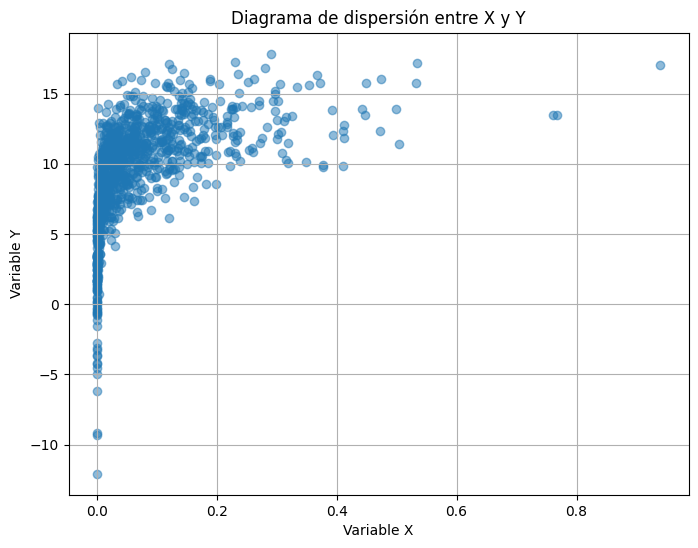

In [19]:
# Creamos un diagrama de dispersión para visualizar la relación entre X y Y
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], alpha=0.5)
plt.title('Diagrama de dispersión entre X y Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.grid(True)
plt.show()

   - En la gráfica de dispersión entre **X** y **Y**  se puede observar cómo los puntos siguen una tendencia positiva moderada, lo que coincide con el coeficiente de correlación (Pearson) de 0.52 que calculamos previamente.

## Posibles transformaciones

In [20]:
#Calculamos los valores de las transformaciones propuestas
df['log_X']   = np.log(df['X'])  ## Transformación logarítmica
df['sqrt_X']  = np.sqrt(df['X']) ## Transformación raíz cuadrada
df['inv_X']   = 1 / (df['X'])    ## Transformación inversa
df['exp_X']   = np.exp(df['X'])  ## Transformación exponencial
df['X_squared'] = df['X'] ** 2   ## Transformación al cuadrado
df['sin_X']   = np.sin(df['X'])    ## Transformación seno

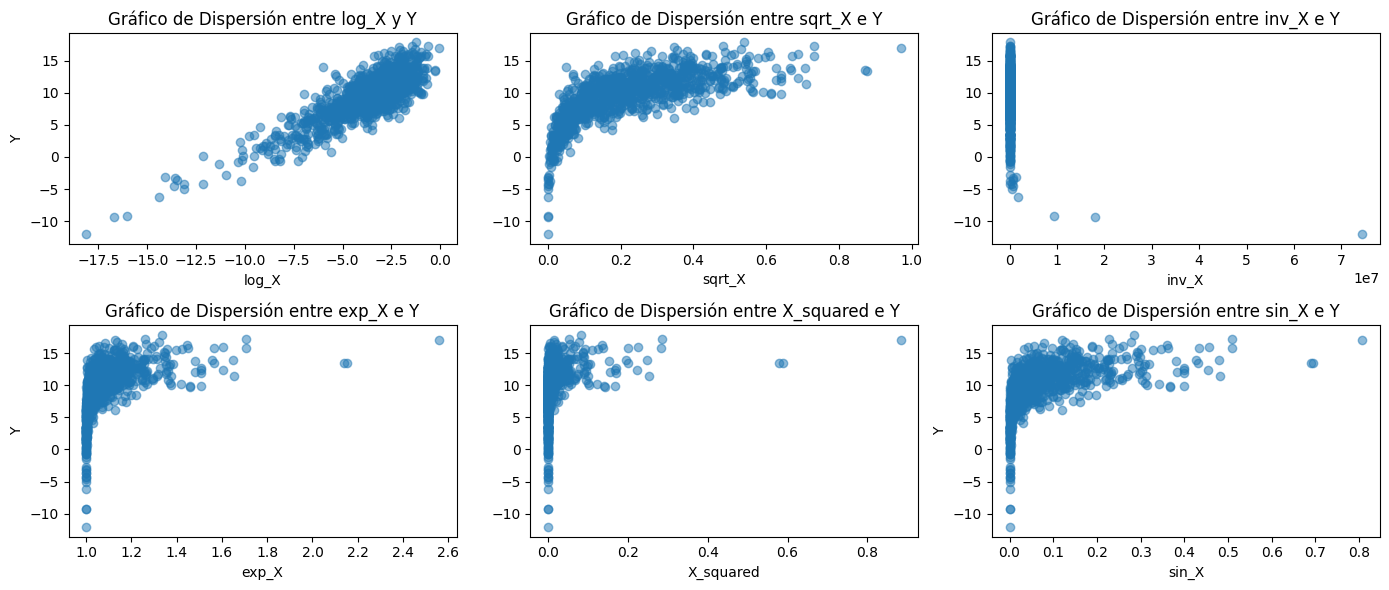

In [21]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 6))  # Ajustar el tamaño para acomodar los gráficos
plt.subplots_adjust(hspace=0.4)  # Añadir espacio vertical entre gráficos si es necesario

# Subplot 1: Transformación logarítmica
plt.subplot(2, 3, 1)
plt.scatter(df['log_X'], df['Y'], alpha=0.5)
plt.xlabel('log_X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre log_X y Y')

# Subplot 2: Transformación raíz cuadrada
plt.subplot(2, 3, 2)
plt.scatter(df['sqrt_X'], df['Y'], alpha=0.5)
plt.xlabel('sqrt_X')
plt.title('Gráfico de Dispersión entre sqrt_X e Y')

# Subplot 3: Transformación inversa
plt.subplot(2, 3, 3)
plt.scatter(df['inv_X'], df['Y'], alpha=0.5)
plt.xlabel('inv_X')
plt.title('Gráfico de Dispersión entre inv_X e Y')

# Subplot 4: Transformación exponencial
plt.subplot(2, 3, 4)
plt.scatter(df['exp_X'], df['Y'], alpha=0.5)
plt.xlabel('exp_X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre exp_X e Y')

# Subplot 5: Transformación al cuadrado
plt.subplot(2, 3, 5)
plt.scatter(df['X_squared'], df['Y'], alpha=0.5)
plt.xlabel('X_squared')
plt.title('Gráfico de Dispersión entre X_squared e Y')

# Subplot 6: Transformación seno
plt.subplot(2, 3, 6)
plt.scatter(df['sin_X'], df['Y'], alpha=0.5)
plt.xlabel('sin_X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre sin_X e Y')

plt.tight_layout()
plt.show()

- Las gráficas de las dispersiones de cada una de las transformaciones nos permite establecer que la transformación logarítmica es la que tiene un comportamiento lineal adecuado.

## Análisis exploratorio de la transformación

In [22]:
df_t = df[['Y','log_X']]

In [23]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   log_X   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [24]:
df_t.describe()

Y   log_X
count 1000.00 1000.00
mean     9.45   -3.82
std      3.91    2.23
min    -12.07  -18.13
25%      7.41   -4.77
50%     10.07   -3.31
75%     12.08   -2.30
max     17.84   -0.06

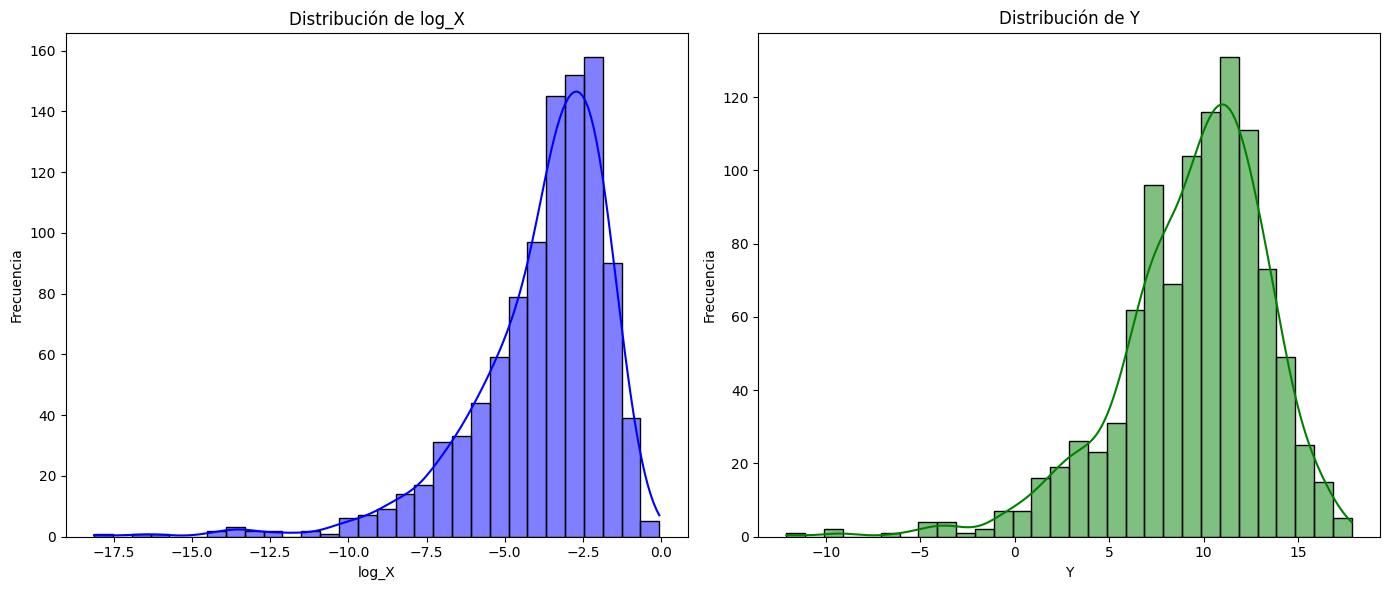

In [25]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 6))

# Subgráfico 1: Histograma para la distribución de X
plt.subplot(1, 2, 1)
sns.histplot(df_t['log_X'], bins=30, kde=True, color='blue')
plt.title('Distribución de log_X')
plt.xlabel('log_X')
plt.ylabel('Frecuencia')

# Subgráfico 2: Histograma para la distribución de Y
plt.subplot(1, 2, 2)
sns.histplot(df_t['Y'], bins=30, kde=True, color='green')
plt.title('Distribución de Y')
plt.xlabel('Y')
plt.ylabel('Frecuencia')

# Mostramos los gráficos
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


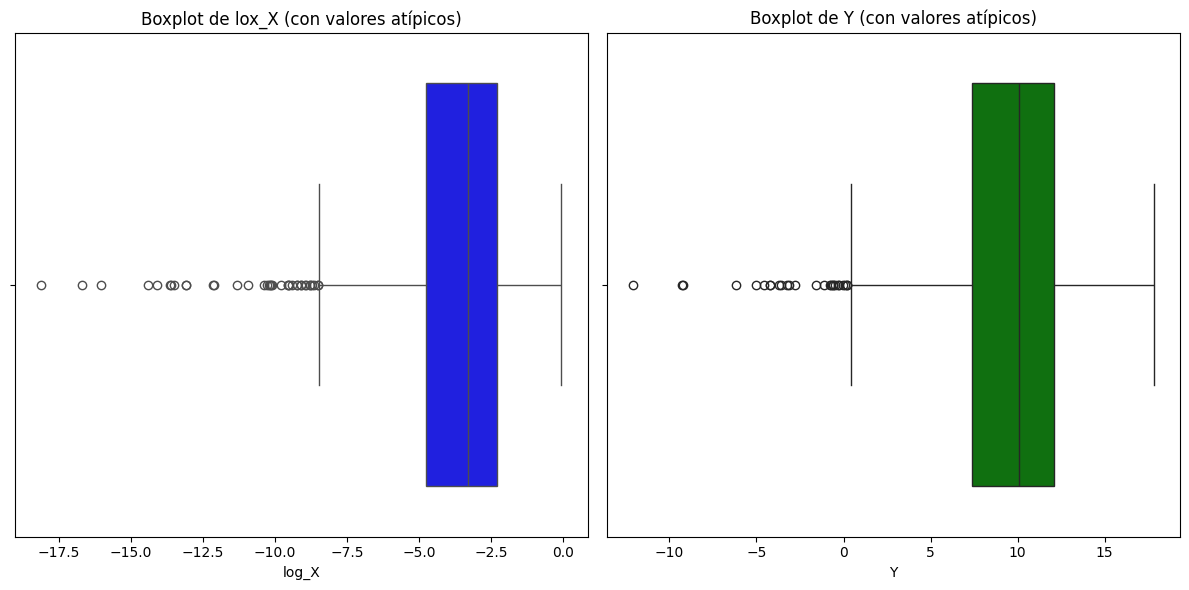

In [26]:
# Usaremos un gráfico de caja, que es útil para visualizar los valores atípicos (outliers).
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Subplot 1: Boxplot for X with outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df_t, x='log_X', color='blue')
plt.title('Boxplot de lox_X (con valores atípicos)')

# Subplot 2: Boxplot for Y with outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_t, x='Y', color='green')
plt.title('Boxplot de Y (con valores atípicos)')

# Display the plots
plt.tight_layout()
plt.show()


In [27]:
# Para identificar valores atípicos, vamos a calcular el IQR (Rango Intercuartílico) y
# obtenemos los valores que se encuentran más allá de 1.5 veces el IQR desde el primer y tercer cuartil.
Q1_X = df_t['log_X'].quantile(0.25)
Q3_X = df_t['log_X'].quantile(0.75)
IQR_X = Q3_X - Q1_X

Q1_Y = df_t['Y'].quantile(0.25)
Q3_Y = df_t['Y'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

# Definiendo los rangos de X y Y
lower_bound_X = Q1_X - 1.5 * IQR_X
upper_bound_X = Q3_X + 1.5 * IQR_X

lower_bound_Y = Q1_Y - 1.5 * IQR_Y
upper_bound_Y = Q3_Y + 1.5 * IQR_Y

# Obteniendo los valores por fuera de los rangos
outliers_X = df_t[(df_t['log_X'] < lower_bound_X) | (df_t['log_X'] > upper_bound_X)]
outliers_Y = df_t[(df['Y'] < lower_bound_Y) | (df['Y'] > upper_bound_Y)]

outliers_X_count = outliers_X.shape[0]
outliers_Y_count = outliers_Y.shape[0]

pd.options.display.float_format = '{:.2f}'.format

print(f'Cantidad de valores atipicos de log_X : {outliers_X_count} que representan el {round((outliers_X_count/df.X.count()) * 100,2)} % de la muestra')
print(f'Cantidad de valores atipicos de Y : {outliers_Y_count} que representan el {round((outliers_Y_count/df.Y.count()) * 100,2)} % de la muestra')

Cantidad de valores atipicos de log_X : 37 que representan el 3.7 % de la muestra
Cantidad de valores atipicos de Y : 26 que representan el 2.6 % de la muestra


In [28]:
# Correlación de Pearson
correlation_X_Y_p = df_t['log_X'].corr(df_t['Y'], method='pearson')
print("Correlación de Pearson:", correlation_X_Y_p)

# Correlación de Spearman
correlation_X_Y_s = df_t['log_X'].corr(df_t['Y'], method='spearman')
print("Correlación de Spearman:", correlation_X_Y_s)

# Correlación de Kendall
correlation_X_Y_k = df_t['log_X'].corr(df_t['Y'], method='kendall')
print("Correlación de Kendall:", correlation_X_Y_k)

Correlación de Pearson: 0.855567835230488
Correlación de Spearman: 0.7678330318330319
Correlación de Kendall: 0.5807767767767769


## Conclusión general del análisis exploratorio

- El conjunto de datos presenta un comportamiento donde **X** tiene una menor variabilidad y parece estar más acotada en su rango, mientras que **Y** presenta una mayor variabilidad y algunos valores extremos importantes. La relación entre las dos variables es positiva moderada, pero los valores atípicos identificados se ven reducidos al momento de aplicar la transformación logarítmica a la variable X.

- De acuerdo al comportamiento de los datos vamos a establecer a **Y** como la variable dependiente de **X** en donde no existe una relación lineal directa entre las dos variables por lo que se sugiere realizar una transformación logarítmica.

## Modelo OLS aplicado a la transformación logarítmica





In [29]:
X = sm.add_constant(df['log_X'])
Y = df['Y']

modelo = sm.OLS(Y, X).fit()

### Validación de los supuestos del modelo

#### 1) Media cero en los residuales

TtestResult(statistic=-1.226064530442312e-13, pvalue=0.9999999999999022, df=999)


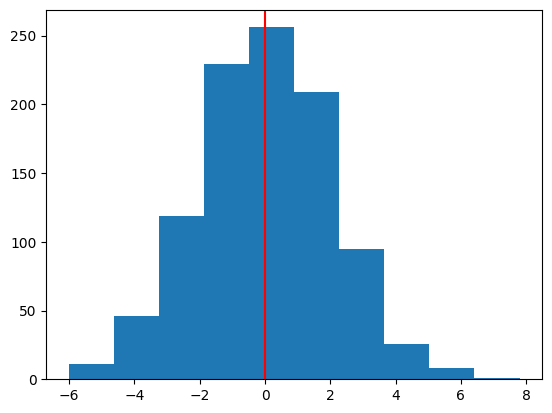

In [30]:
residuales = modelo.resid

## 1) Media cero en los residuales

## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

plt.hist(residuales)
plt.axvline(np.mean(residuales), color = "red")
plt.show()


Como p-valor = 0.9999999999999022 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente para rechazar la hipotesis nula. Por lo tanto se asume la media cero en los residuales.

#### 2) Normalidad en los residuales

ShapiroResult(statistic=0.9991617550230457, pvalue=0.9427671920709753)
KstestResult(statistic=0.16638214652560734, pvalue=1.1549379963073872e-24, statistic_location=-1.4861641522637261, statistic_sign=1)
SignificanceResult(statistic=0.3051606725303149, pvalue=0.8584899233118956)


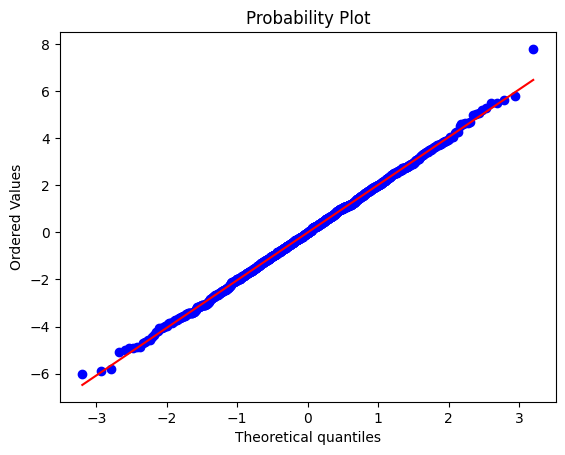

In [31]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad
probplot(residuales, dist = "norm", plot = pylab)
plt.show()

NORMALIDAD: Por Shapiro Wilks: Como pvalor=0.9427671920709753 > $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% no existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos Normalidad en los datos.

NO NORMALIDAD: Por Kolmogorov-Smirnov: Como pvalor= 1.1549379963073872e-24 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para  rechazar la hipotesis nula por lo tanto NO suponemos Normalidad en los datos.

NORMALIDAD: Por Jarque-Bera: Como pvalor=0.8584899233118956 > $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% no existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos Normalidad en los datos.

Deacuerdo a que dos de las tres pruebas nos sugieren normalidad en los datos, reafirmamos el comportamiento de normalidad en los residuales.

#### 3) Independencia en los residuales

In [32]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print('Valor Durbin Watson :',durbin_watson(residuales))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

Valor Durbin Watson : 1.9819250655292384


**Conclusion:** Como **DW = 1.9819250655292384** que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral para rechazar la hipotesis nula por lo tanto suponemos que los residuales son independientes.

#### 4) Residuales homocedasticos (varianza cte)

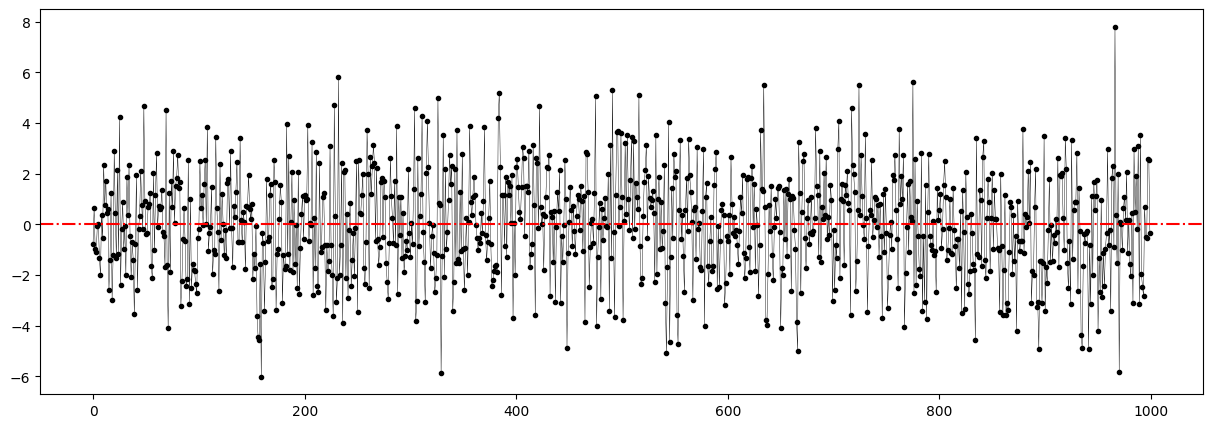

In [33]:
plt.figure(figsize = (15, 5))
plt.plot(residuales, '.-', color = "black", linewidth = 0.3)
plt.axhline(y=0, color='r', linestyle='-.')

In [34]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales, sm.add_constant(df['X']))

(0.009035989356864782,
 0.9242689001789058,
 0.009017998864637668,
 0.9243631637618863)

Como el p-valor 0.92 > alfa, donde alfa=0.05, con un nivel de significancia del 5%, No existe evidencia muestral suficiente para rechazar la hipótesis nula por lo tanto suponemos homocedaticidad

### Resumen del modelo OLS aplicado a la trasnformación logarítmica

In [35]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2726.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.29e-287
Time:                        00:47:01   Log-Likelihood:                -2123.1
No. Observations:                1000   AIC:                             4250.
Df Residuals:                     998   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1706      0.127    119.481      0.0

- Modelo lineal:  y = 15.1706 + 1.4987 ln(X)

- El valor Prob (F-statistic): 1.29e-287 nos dice que es extremadamente improbable que los resultados del modelo sean debidos al azar. Esto confirma que log(X) tiene un impacto significativo sobre Y y que el modelo en su conjunto es estadísticamente significativo.

- R-cuadrado (R-squared: 0.732): Este valor indica que el modelo explica el 73.2% de la variabilidad de la variable dependiente Y. Esto sugiere que la relación entre log(X) y Y es bastante fuerte, ya que más del 70% de la variación de Y Y puede explicarse con log(X)

In [36]:
df['y_hat'] = 15.1706 + 1.4987 * (np.log(df['X']))

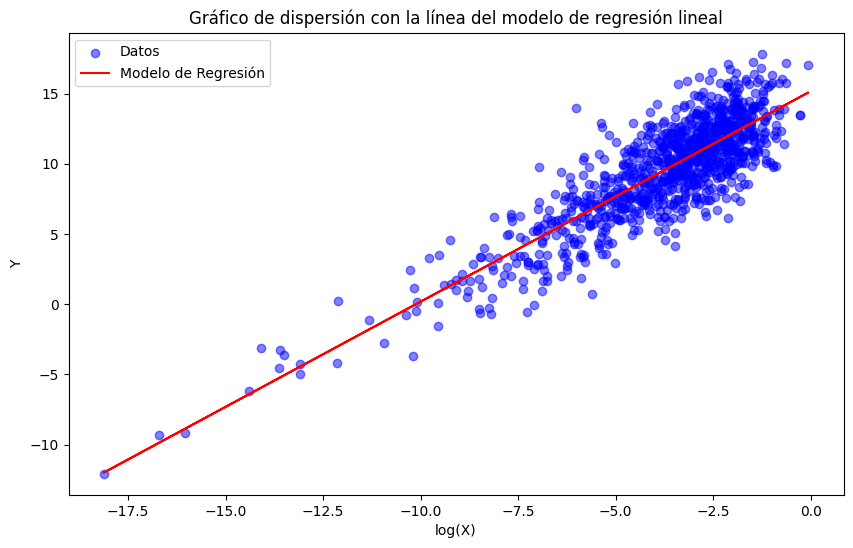

In [37]:
# Generar el gráfico de dispersión con la línea del modelo de regresión
plt.figure(figsize=(10, 6))

# Gráfico de dispersión entre log(X) y Y
plt.scatter(df['log_X'], df['Y'], color='blue', label='Datos', alpha=0.5)
plt.xlabel('log(X)')
plt.ylabel('Y')

# Línea de regresión
plt.plot(df['log_X'], modelo.predict(X), color='red', label='Modelo de Regresión')

# Etiquetas y título
plt.xlabel('log(X)')
plt.ylabel('Y')
plt.title('Gráfico de dispersión con la línea del modelo de regresión lineal')
plt.legend()

# Mostrar el gráfico
plt.show()

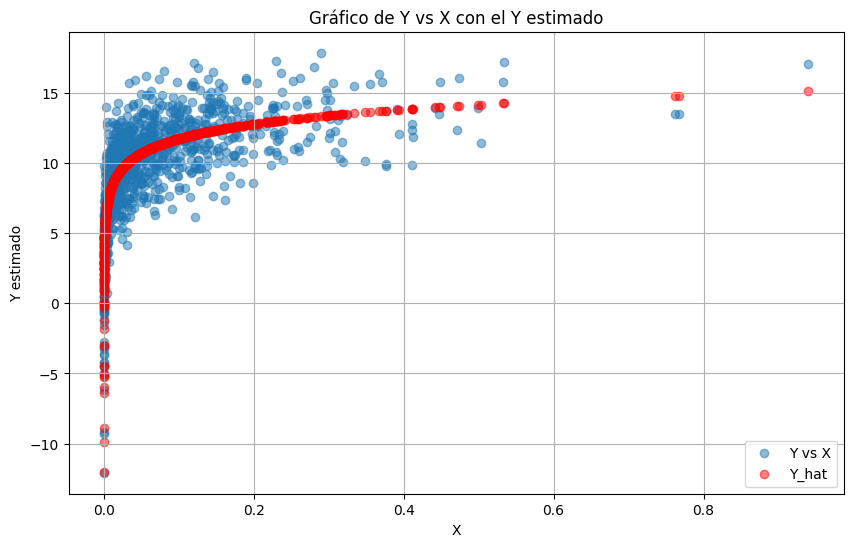

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], label='Y vs X', alpha=0.5)
plt.scatter(df['X'], df['y_hat'], color='red', label='Y_hat', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y estimado')
plt.title('Gráfico de Y vs X con el Y estimado')
plt.legend()
plt.grid(True)
plt.show()


# Ejercicio 3

Considere el conjunto de datos “Wine Quality” del fichero datos.xls. Defina como variable respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.

Librerias usadas

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.model_selection import train_test_split

logging.getLogger('matplotlib').setLevel(logging.ERROR) # Para no mostrar mensajes Warning

## Primera parte

Estandarice las variables, calcule las matrices de correlación de Pearson , Kendall y Spearman y compárelas ¿Qué diferencia encuentra entre las esstructuras de dependencias obtenidas?

In [40]:
#Ubicacion de los arhivos
root_dir = '/content/drive/MyDrive/Colab Notebooks/Analisis_Cuantitativo/AnalisisCuantitativo_Taller1/datos.xls'
df = pd.read_excel(root_dir, sheet_name='Wine Quality', skiprows = 2)

In [41]:
df

Calidad del Vino  Acidez Fija  Acidez Volátil  Ácido Cítrico  \
0                    6         7.00            0.27           0.36   
1                    6         6.30            0.30           0.34   
2                    6         8.10            0.28           0.40   
3                    6         7.20            0.23           0.32   
4                    6         7.20            0.23           0.32   
...                ...          ...             ...            ...   
4893                 6         6.20            0.21           0.29   
4894                 5         6.60            0.32           0.36   
4895                 6         6.50            0.24           0.19   
4896                 7         5.50            0.29           0.30   
4897                 6         6.00            0.21           0.38   

      Azúcar Residual  Cloruros  Dióxido de Azúfre Libre  \
0               20.70      0.04                    45.00   
1                1.60      0.05                    14.00   
2                6.90      0.05                    30.00   
3                8.50      0.06                    47.00   
4                8.50      0.06                    47.00   
...               ...       ...                      ...   
4893             1.60      0.04                    24.00   
4894             8.00      0.05                    57.00   
4895             1.20      0.04                    30.00   
4896             1.10      0.02                    20.00   
4897             0.80      0.02                    22.00   

      Dióxido de Azúfre Total  Densidad   pH  Sulfatos  Alcohol  
0                      170.00      1.00 3.00      0.45     8.80  
1                      132.00      0.99 3.30      0.49     9.50  
2                       97.00      1.00 3.26      0.44    10.10  
3                      186.00      1.00 3.19      0.40     9.90  
4                      186.00      1.00 3.19      0.40     9.90  
...                       ...       ...  ...       ...      ...  
4893                    92.00      0.99 3.27      0.50    11.20  
4894                   168.00      0.99 3.15      0.46     9.60  
4895                   111.00      0.99 2.99      0.46     9.40  
4896                   110.00      0.99 3.34      0.38    12.80  
4897                    98.00      0.99 3.26      0.32    11.80  

[4898 rows x 12 columns]

Tenemos 4898 observaciones con 12 variables

In [42]:
# Eliminar las columnas pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad del Vino
columnas_a_eliminar = ['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino']
df = df.drop(columns=columnas_a_eliminar)

df.head()

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0           0.36            20.70                    45.00   
1           0.34             1.60                    14.00   
2           0.40             6.90                    30.00   
3           0.32             8.50                    47.00   
4           0.32             8.50                    47.00   

   Dióxido de Azúfre Total  Densidad  Alcohol  
0                   170.00      1.00     8.80  
1                   132.00      0.99     9.50  
2                    97.00      1.00    10.10  
3                   186.00      1.00     9.90  
4                   186.00      1.00     9.90

Considerando el conjunto de datos “Wine Quality” del fichero datos.xls. Se define como variable respuesta (Y) la columna "Densidad" y se eliminan las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.

In [43]:
# Estandarizando las variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0           0.21             2.82                     0.57   
1           0.05            -0.94                    -1.25   
2           0.54             0.10                    -0.31   
3          -0.12             0.42                     0.69   
4          -0.12             0.42                     0.69   

   Dióxido de Azúfre Total  Densidad  Alcohol  
0                     0.74      2.33    -1.39  
1                    -0.15     -0.01    -0.82  
2                    -0.97      0.36    -0.34  
3                     1.12      0.53    -0.50  
4                     1.12      0.53    -0.50

Se calculan las matrices de correlación:

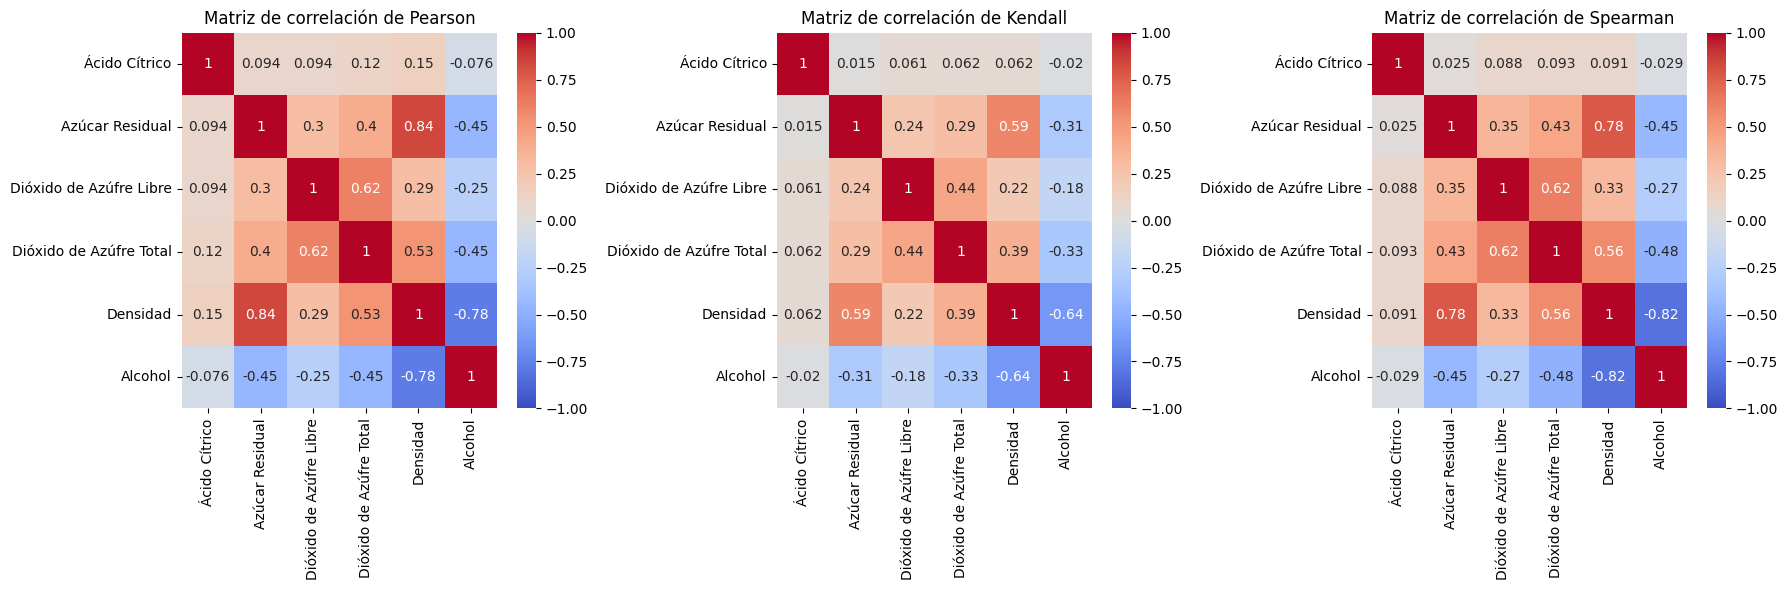

In [44]:
# Calcular las matrices de correlación de Pearson, Kendall y Spearman
correlacion_pearson = df_scaled.corr(method='pearson')
correlacion_kendall = df_scaled.corr(method='kendall')
correlacion_spearman = df_scaled.corr(method='spearman')

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.heatmap(correlacion_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de Pearson')

# Gráfico de correlación de Kendall
plt.subplot(1, 3, 2)
sns.heatmap(correlacion_kendall, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de Kendall')

# Gráfico de correlación de Spearman
plt.subplot(1, 3, 3)
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de Spearman')

plt.tight_layout()
plt.show()

En resumen, las estructuras de dependencia difieren en magnitud y, en algunos casos, en dirección según el método de correlación utilizado, sin embargo, en los 3 tipos de correlación vemos que se mantiene una correlación fuerte positiva entre las variables **Azúcar Residual vs Densidad**, y una correlación fuerte negativa entre las variables **Densidad vs Alcohol**, lo que signifca que por los 3 metodos se concluye que hay una dependencia lineal entre las variables mencionadas anteriormente.

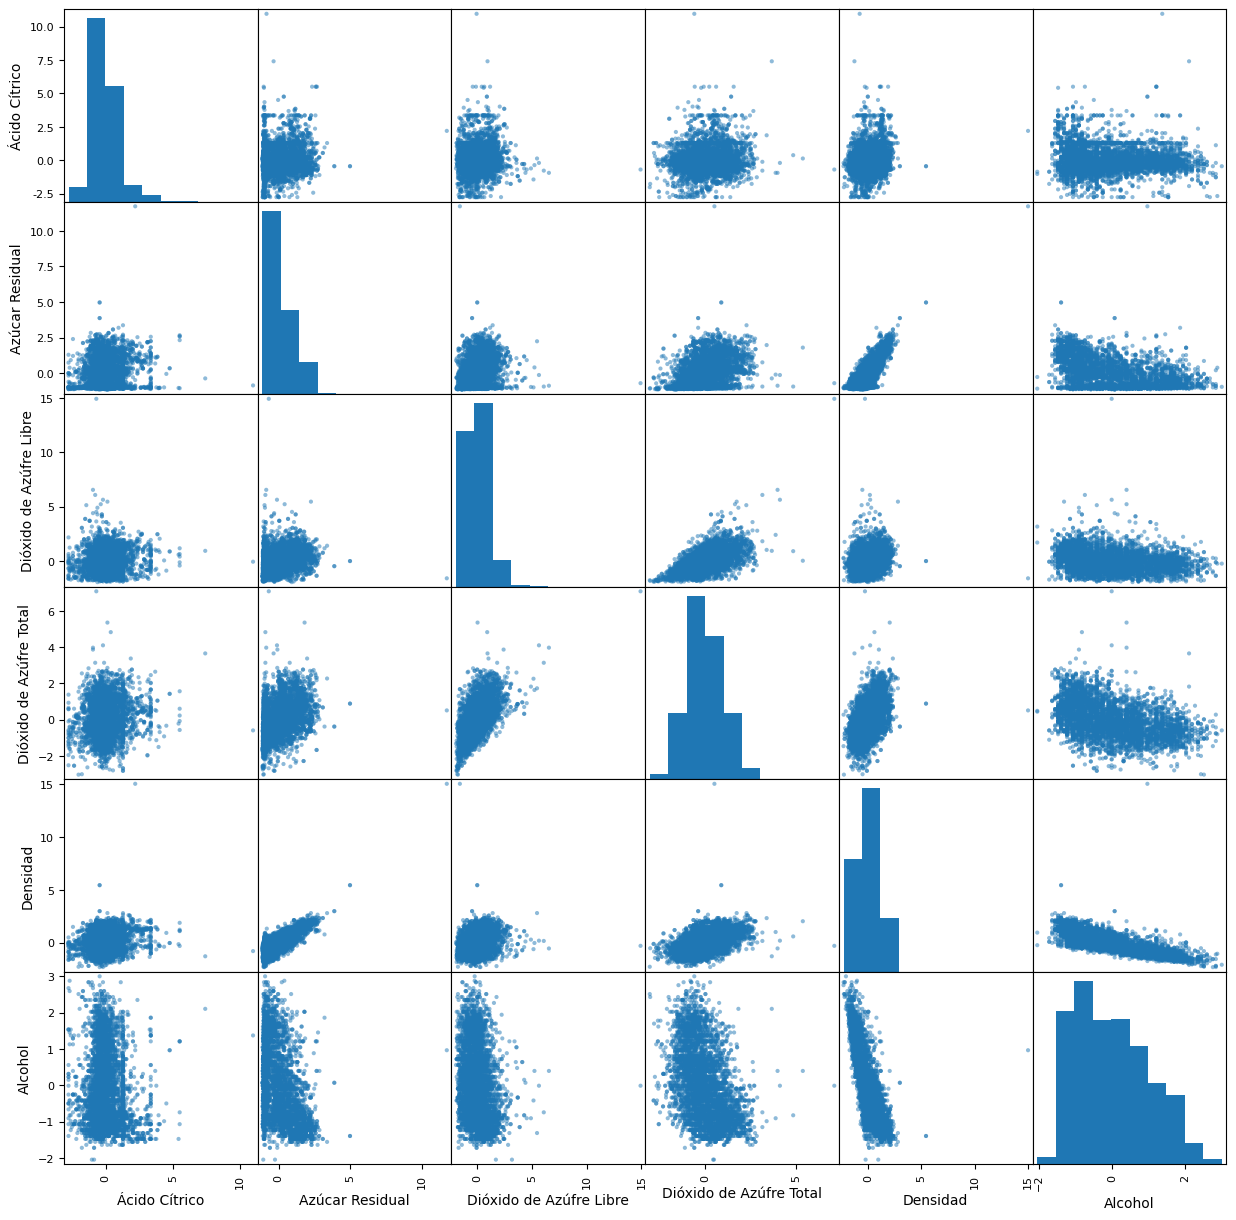

In [45]:
# Relizar el ScatterPlot
pd.plotting.scatter_matrix(df_scaled, figsize=(15, 15))
plt.show()

Con la gráfica anterior, se corrobora el comportamiento lineal entre la **Azúcar Residual vs Densidad** y **Densidad vs Alcohol**, esto por la forma elíptica en las gráficas de dispersión.

## Segunda parte

Realice una partición de los datos tipo 80–20, donde el primer 80% de los datos es una muestra de entrenamiento y el restante 20% una muestra de prueba/predicción.

Luego, construya 3 modelos RLM con las matrices estimadas en el primer ítem
Compare e interprete los valores de los co-eficientes de regresión obtenidos por cada método.

Forma alternativa

$$ \hat{\beta}^{[0]} = \hat{\Sigma}_{XX}^{-1}\hat{\Sigma}_{XY}$$

$$\hat{\beta_0}=\bar{y}-\bar{X}^\top\hat{\beta}^{[0]}$$

#### Modelo 1: Pearson

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 123)

################## Fase de Entrenamiento (Solo df_train) #######################
scaler = StandardScaler()
scaler.fit(df_train)

df_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)

Sigma = df_scaled[[ 'Ácido Cítrico','Azúcar Residual','Dióxido de Azúfre Libre',
	'Dióxido de Azúfre Total','Alcohol','Densidad']].corr(method='pearson').values

Sigma_XX = Sigma[:5, :5]
Sigma_Xy = Sigma[:5, 5]

beta_sincero = np.linalg.inv(Sigma_XX) @ Sigma_Xy

beta0 = df_scaled[["Densidad"]].mean().values - df_scaled[['Ácido Cítrico',
  'Azúcar Residual','Dióxido de Azúfre Libre',
	'Dióxido de Azúfre Total','Alcohol']].mean(axis = 0).values @ beta_sincero

beta_hat = np.array(list(beta0) + list(beta_sincero))

print(beta_hat)

[ 3.89731279e-15  4.72624189e-02  6.02897990e-01 -7.92827395e-02
  1.21600843e-01 -4.63921343e-01]


In [47]:
################# Fase de testing (Usamos df_test) #############################

df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

y_test_scaled = df_test_scaled.Densidad.values
X_test_scaled = df_test_scaled.drop('Densidad', axis = 1).values

y_pred_test = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled)) @ beta_hat

In [48]:
residuales_test = y_test_scaled - y_pred_test

RMSE_Pearson = np.sqrt(sum(residuales_test**2)/len(residuales_test))

print(f"RMSE_Pearson: {RMSE_Pearson}")

RMSE_Pearson: 0.2579086434676381


Validando los supuestos del modelo:

TtestResult(statistic=1.4744461577894097, pvalue=0.1406829902045501, df=979)


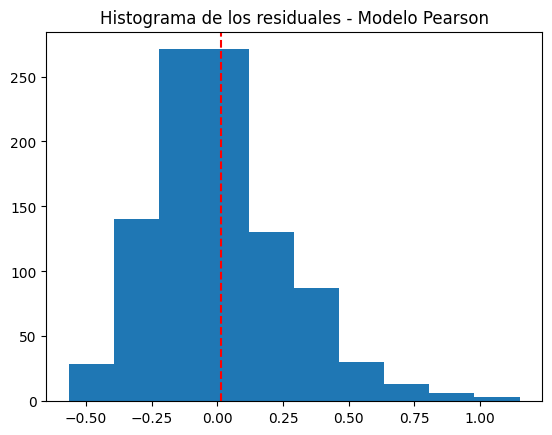

In [49]:
## 1) Media cero en los residales
from scipy.stats import ttest_1samp
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales_test, 0))

plt.hist(residuales_test)
plt.title("Histograma de los residuales - Modelo Pearson")
plt.axvline(np.mean(residuales_test), color = "red", linestyle = "--")
plt.show()

Como p-valor = 0.1406 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente para rechazar la hipotesis nula, por lo tanto suponemos que la media de los residuales es cero

ShapiroResult(statistic=0.9639351258908433, pvalue=7.62880990001147e-15)
KstestResult(statistic=0.3198979746997523, pvalue=1.0467167618827446e-89, statistic_location=-0.42838976096165493, statistic_sign=-1)
SignificanceResult(statistic=170.3338179953216, pvalue=1.0291564057541786e-37)


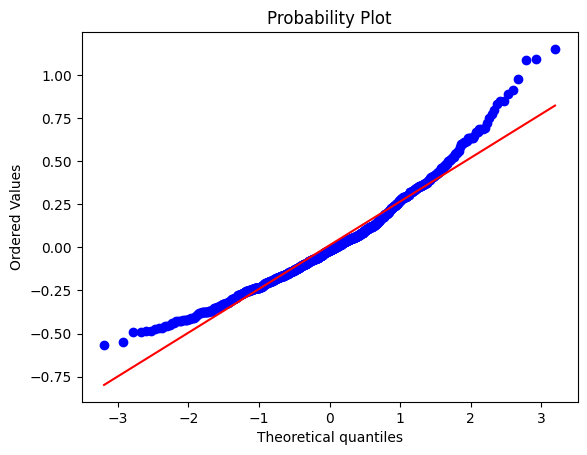

In [50]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab

print(shapiro(residuales_test))
print(kstest(residuales_test, "norm"))
print(jarque_bera(residuales_test))

### Grafico QQ-plot para Normalidad
probplot(residuales_test, dist = "norm", plot = pylab)
plt.show()

- NO NORMALIDAD: Por Shapiro Wilks: Como pvalor=7.62880990001147e-15 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos que NO hay Normalidad en los datos.

- NO NORMALIDAD: Por Kolmogorov-Smirnov: Como pvalor=1.0467167618827446e-89 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para  rechazar la hipotesis nula por lo tanto NO suponemos Normalidad en los datos.

- NO NORMALIDAD: Por Jarque-Bera: Como pvalor=1.0291564057541786e-37 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos NO  Normalidad en los datos.

Valor Durbin Watson : 1.9211342963863385


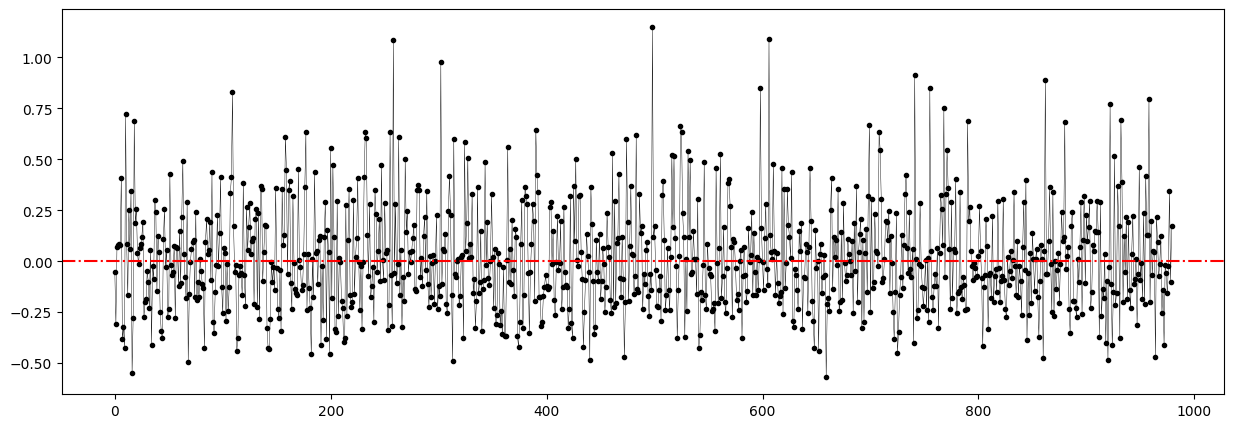

In [51]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print('Valor Durbin Watson :',durbin_watson(residuales_test))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 1.92 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.

plt.figure(figsize = (15, 5))
plt.plot(residuales_test, '.-', color = "black", linewidth = 0.3)
plt.axhline(y=0, color='r', linestyle='-.')

In [52]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales_test, sm.add_constant(X_test_scaled))

(40.20385338621285,
 1.3584740755785257e-07,
 8.333414291868484,
 9.999942401917673e-08)

Como el p-valor 1.3584740755784574e-07 < alfa, donde alfa=0.05, con un nivel de significancia del 5%, existe evidencia muestral suficiente para rechazar la hipotesis nula por lo tanto suponemos que NO hay  homocedasticidad

### Modelo 2: Kendall

In [53]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 123)

scaler = StandardScaler()
scaler.fit(df_train)

df_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)

Sigma = df_scaled[[ 'Ácido Cítrico','Azúcar Residual','Dióxido de Azúfre Libre',
	'Dióxido de Azúfre Total','Alcohol','Densidad']].corr(method='kendall').values

Sigma_XX = Sigma[:5, :5]
Sigma_Xy = Sigma[:5, 5]

beta_sincero = np.linalg.inv(Sigma_XX) @ Sigma_Xy

beta0 = df_scaled[["Densidad"]].mean().values - df_scaled[['Ácido Cítrico','Azúcar Residual','Dióxido de Azúfre Libre',
	'Dióxido de Azúfre Total','Alcohol']].mean(axis = 0).values @ beta_sincero

beta_hat = np.array(list(beta0) + list(beta_sincero))

print(beta_hat)

[ 3.94321536e-15  3.54198149e-02  4.13190030e-01 -2.07200642e-02
  1.22780732e-01 -4.72581499e-01]


In [54]:
################# Fase de testing (Usamos df_test) #############################

df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

y_test_scaled = df_test_scaled.Densidad.values
X_test_scaled = df_test_scaled.drop('Densidad', axis = 1).values

y_pred_test = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled)) @ beta_hat

residuales_test = y_test_scaled - y_pred_test

RMSE_kendall= np.sqrt(sum(residuales_test**2)/len(residuales_test))

print(f"RMSE_Kendall: {RMSE_kendall}")

RMSE_Kendall: 0.2934599995325003


Validando los supuesto del modelo

TtestResult(statistic=1.2519492261882699, pvalue=0.21088738800514525, df=979)


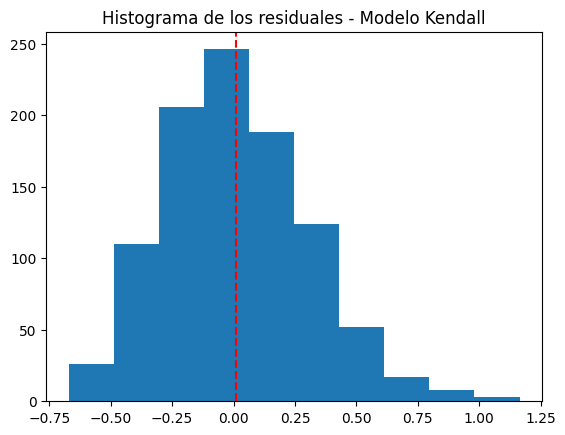

In [55]:
## 1) Media cero en los residales
from scipy.stats import ttest_1samp
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales_test, 0))

plt.hist(residuales_test)
plt.title("Histograma de los residuales - Modelo Kendall")
plt.axvline(np.mean(residuales_test), color = "red", linestyle = "--")
plt.show()

Como p-valor = 0.021 < 0.05, con un nivel de significancia alfa = 0.05, existe evidencia muestral suficiente para rechazar la hipotesis nula, por lo tanto la media de los residuales es diferente de 0

ShapiroResult(statistic=0.9856155149605119, pvalue=3.133967085504339e-08)
KstestResult(statistic=0.29129817120830404, pvalue=3.75292972462625e-74, statistic_location=-0.4425288662954272, statistic_sign=-1)
SignificanceResult(statistic=42.25839149901185, pvalue=6.663568690356712e-10)


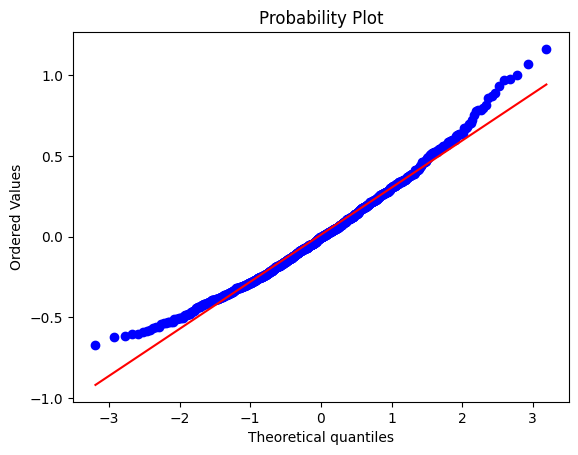

In [56]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab

print(shapiro(residuales_test))
print(kstest(residuales_test, "norm"))
print(jarque_bera(residuales_test))

### Grafico QQ-plot para Normalidad
probplot(residuales_test, dist = "norm", plot = pylab)
plt.show()

- NO NORMALIDAD: Por Shapiro Wilks: Como pvalor=3.133967085504339e-08 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% no existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos Normalidad en los datos.

- NO NORMALIDAD: Por Kolmogorov-Smirnov: Como pvalor=3.75292972462625e-74 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para  rechazar la hipotesis nula por lo tanto NO suponemos Normalidad en los datos.

- NO NORMALIDAD: Por Jarque-Bera: Como pvalor=6.663568690356712e-10 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos NO Normalidad en los datos.

2.005790878200299


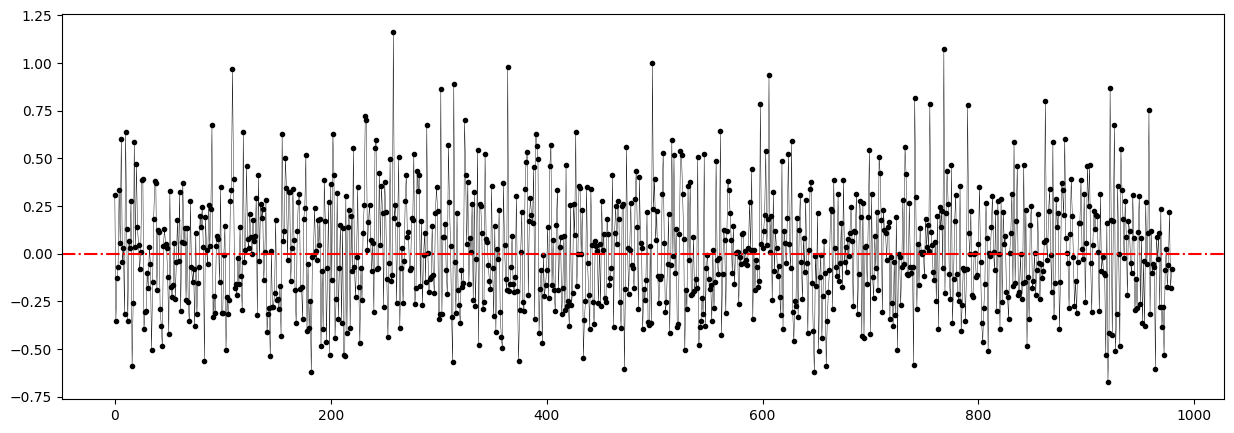

In [57]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales_test))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 2.005 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.

plt.figure(figsize = (15, 5))
plt.plot(residuales_test, '.-', color = "black", linewidth = 0.3)
plt.axhline(y=0, color='r', linestyle='-.')

In [58]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales_test, sm.add_constant(X_test_scaled))

(9.571981682774824,
 0.08831211931541662,
 1.9214429062321237,
 0.08821806362232343)

Como el p-valor 0.08821 > alfa, donde alfa=0.05, con un nivel de significancia del 5%, No existe evidencia muestral suficiente para rechazar la hipotesis nula por lo tanto suponemos que hay homocedasticidad

### Modelo 3: Spearman

In [59]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 123)

scaler = StandardScaler()
scaler.fit(df_train)


df_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)

Sigma = df_scaled[[ 'Ácido Cítrico','Azúcar Residual','Dióxido de Azúfre Libre',
	'Dióxido de Azúfre Total','Alcohol','Densidad']].corr(method='spearman').values

Sigma_XX = Sigma[:5, :5]
Sigma_Xy = Sigma[:5, 5]

beta_sincero = np.linalg.inv(Sigma_XX) @ Sigma_Xy

beta0 = df_scaled[["Densidad"]].mean().values - df_scaled[['Ácido Cítrico','Azúcar Residual','Dióxido de Azúfre Libre',
	'Dióxido de Azúfre Total','Alcohol']].mean(axis = 0).values @ beta_sincero

beta_hat = np.array(list(beta0) + list(beta_sincero))

print(beta_hat)

[ 3.84162066e-15  5.25481134e-02  5.02454619e-01 -7.76273062e-02
  1.28668976e-01 -5.55277152e-01]


In [60]:
################# Fase de testing (Usamos df_test) #############################

df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

y_test_scaled = df_test_scaled.Densidad.values
X_test_scaled = df_test_scaled.drop('Densidad', axis = 1).values

y_pred_test = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled)) @ beta_hat

In [61]:
residuales_test = y_test_scaled - y_pred_test

RMSE_spearman= np.sqrt(sum(residuales_test**2)/len(residuales_test))

print(f"RMSE: {RMSE_spearman}")

RMSE: 0.2656948719912183


Validación de los supuestos del modelo

TtestResult(statistic=2.0909424968288537, pvalue=0.036790565202314204, df=979)


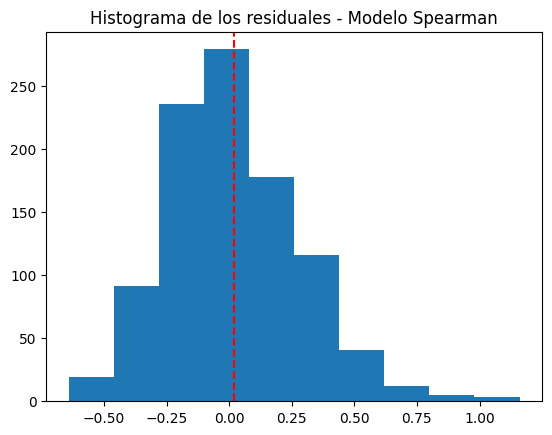

In [62]:
## 1) Media cero en los residales
from scipy.stats import ttest_1samp
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales_test, 0))

plt.hist(residuales_test)
plt.title("Histograma de los residuales - Modelo Spearman")
plt.axvline(np.mean(residuales_test), color = "red", linestyle = "--")
plt.show()

Como p-valor = 0.036 < 0.05, con un nivel de significancia alfa = 0.05, existe evidencia muestral suficiente para rechazar la hipotesis nula, por lo tanto la media de los residuales es diferente de 0

ShapiroResult(statistic=0.9830521587752212, pvalue=3.000006581690068e-09)
KstestResult(statistic=0.3112061622338793, pvalue=8.23276379519702e-85, statistic_location=-0.39641340371932887, statistic_sign=-1)
SignificanceResult(statistic=64.77569981713383, pvalue=8.592815836906505e-15)


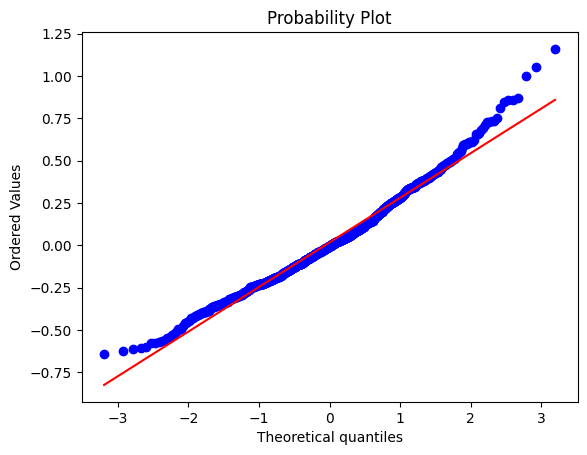

In [63]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab

print(shapiro(residuales_test))
print(kstest(residuales_test, "norm"))
print(jarque_bera(residuales_test))

### Grafico QQ-plot para Normalidad
probplot(residuales_test, dist = "norm", plot = pylab)
plt.show()

- NO NORMALIDAD: Por Shapiro Wilks: Como pvalor=3.000006581690068e-0 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% no existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos Normalidad en los datos.

- NO NORMALIDAD: Por Kolmogorov-Smirnov: Como pvalor=8.23276379519702e-8 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para  rechazar la hipotesis nula por lo tanto NO suponemos Normalidad en los datos.

- NO NORMALIDAD: Por Jarque-Bera: Como pvalor= 8.592815836906505e-15< $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos NO Normalidad en los datos.

1.9515032283551343


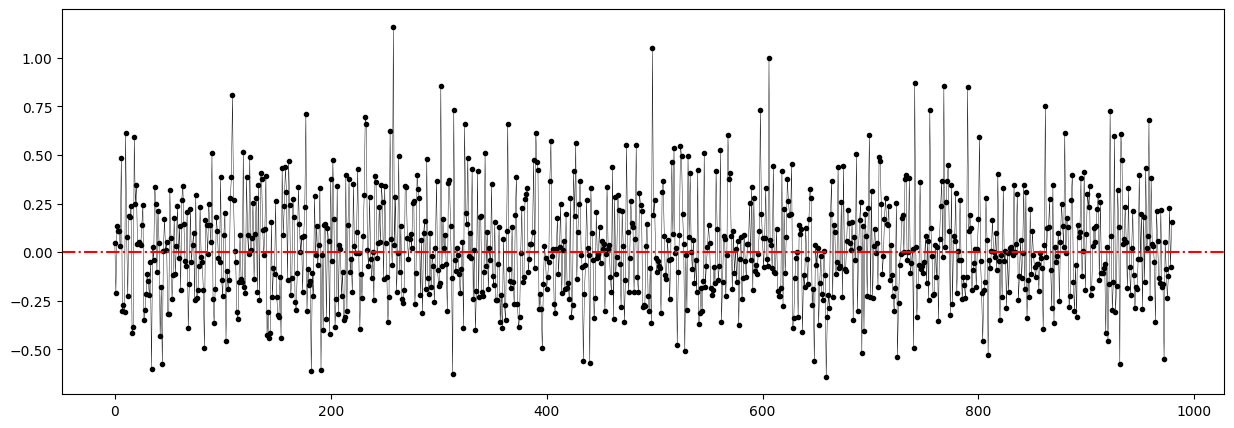

In [64]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales_test))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

### Conclusion: Como DW = 1.95 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral
### para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.

plt.figure(figsize = (15, 5))
plt.plot(residuales_test, '.-', color = "black", linewidth = 0.3)
plt.axhline(y=0, color='r', linestyle='-.')

In [65]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales_test, sm.add_constant(X_test_scaled))

### Como el p-valor 8.042483585752483e-06 < alfa, donde alfa=0.05, con un nivel de significancia del 5%, Existe evidencia muestral
### suficiente para rechazar la hipotesis nula por lo tanto suponemos que hay NO Homocedasticidad

(30.979704873911963,
 9.454074822886325e-06,
 6.359027873725569,
 8.042483585753713e-06)

### Comparación de los modelos

In [66]:
print(f"RMSE_Pearson: {RMSE_Pearson}")
print(f"RMSE_Kendall: {RMSE_kendall}")
print(f"RMSE_Spearman: {RMSE_spearman}")

RMSE_Pearson: 0.2579086434676381
RMSE_Kendall: 0.2934599995325003
RMSE_Spearman: 0.2656948719912183


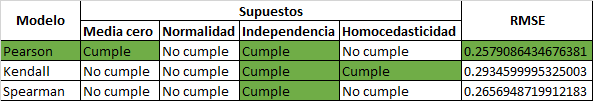

De acuerdo a la comparación de los tres modelos escogemos como el mejor, el realizado con la matriz de correlación de Pearson.

Modelo lineal:

$y_i = (3.89731279e-15)+(4.72624189e-02)X_1+(6.02897990e-01)X_2-(7.92827395e-02)X_3+(1.21600843e-01)X_4-(4.63921343e-01)X_5$





## Tercera parte

Realice un análisis del diagrama de dispersión del conjunto de datos ¿Se evidencian comportamientos
totalmente lineales? Si la respuesta es negativa, sugiera y realice transformaciones de variables y justifique el por qué de esa
transformación. Finalmente, genere un modelo RLM e interprételo detalladamente.


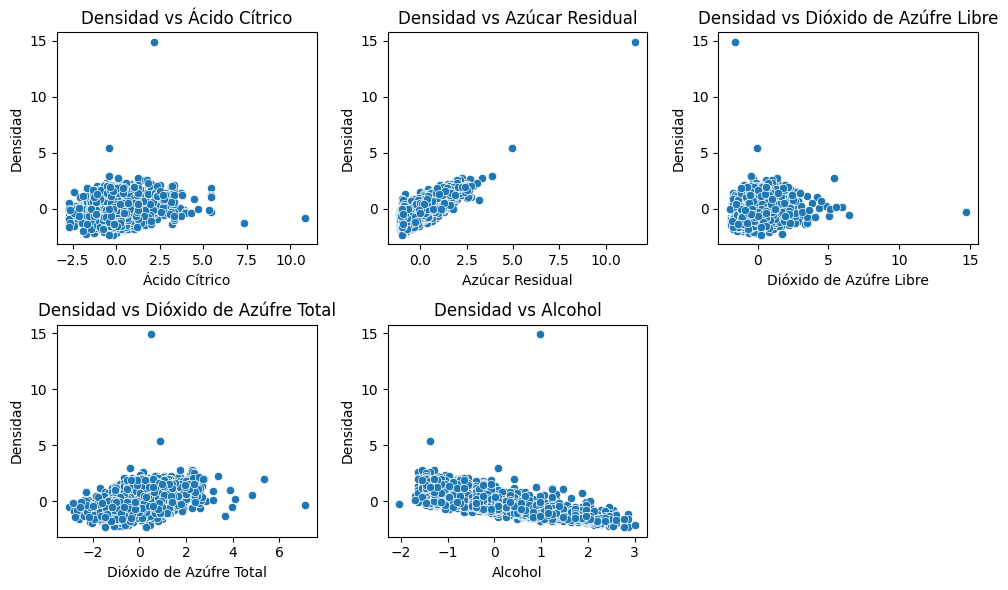

In [67]:
variables_x = ['Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre',
               'Dióxido de Azúfre Total', 'Alcohol']
y_variable = 'Densidad'

# Crear una figura y ejes para los gráficos
plt.figure(figsize=(10, 6))

# Crear gráficos de dispersión para cada variable independiente contra la variable 'Densidad'
for i, var in enumerate(variables_x):
    plt.subplot(2, 3, i+1)  # Crear una cuadrícula de 2 filas y 3 columnas
    sns.scatterplot(x=df_scaled[var], y=df_scaled[y_variable])
    plt.title(f'Densidad vs {var}')
    plt.xlabel(var)
    plt.ylabel(y_variable)

plt.tight_layout()  # Ajustar el layout para evitar solapamiento
plt.show()

#### Evaluación de las trasformaciones

In [68]:
df_scaled['inv_X1'] = 1 / (df_scaled['Ácido Cítrico']) ## Transformación inversa
df_scaled['exp_X1'] = np.exp(df_scaled['Ácido Cítrico']) ## Transformación exponencial
df_scaled['X1_squared'] = df_scaled['Ácido Cítrico'] ** 2 ## Transformación al cuadrado
df_scaled['sin_X1'] = np.sin(df_scaled['Ácido Cítrico'])  ## Transformación seno
df_scaled['cos_X1'] = np.cos(df_scaled['Ácido Cítrico'])  ## Transformación coseno

Text(0.5, 1.0, 'Gráfico de Dispersión entre cos_X e Y')

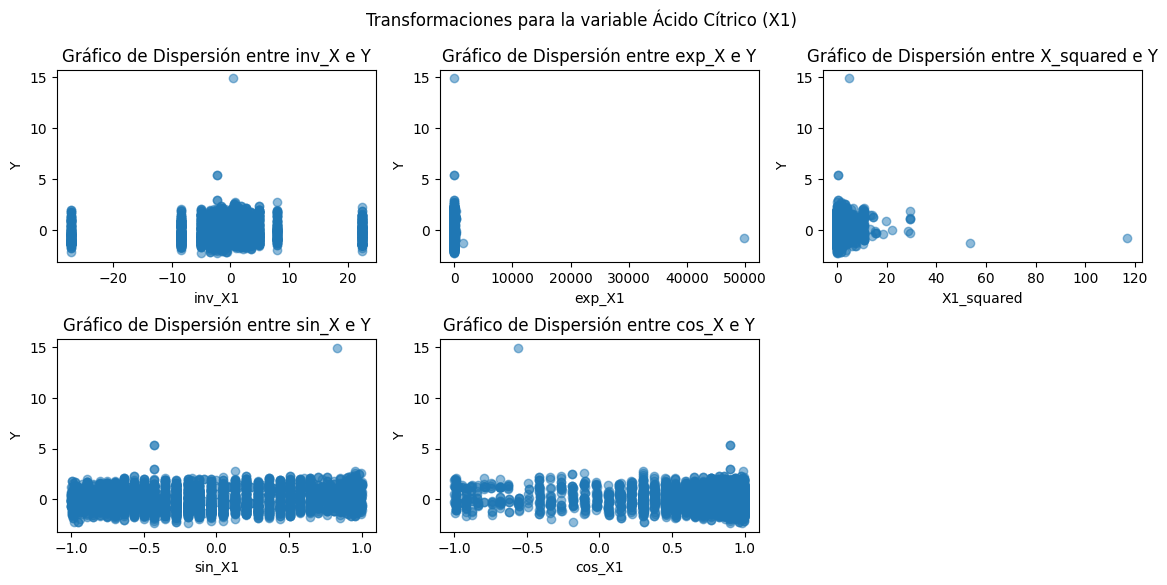

In [69]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 6))  # Ajustar el tamaño para acomodar los gráficos
plt.suptitle("Transformaciones para la variable Ácido Cítrico (X1)")
plt.subplots_adjust(hspace=0.4)  # Añadir espacio vertical entre gráficos si es necesario

# Subplot 1: Transformación inversa
plt.subplot(2, 3, 1)
plt.scatter(df_scaled['inv_X1'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('inv_X1')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre inv_X e Y')

# Subplot 2: Transformación exponencial
plt.subplot(2, 3, 2)
plt.scatter(df_scaled['exp_X1'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('exp_X1')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre exp_X e Y')

# Subplot 3: Transformación cuadratica
plt.subplot(2, 3, 3)
plt.scatter(df_scaled['X1_squared'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('X1_squared')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre X_squared e Y')

# Subplot 4: Transformación seno
plt.subplot(2, 3, 4)
plt.scatter(df_scaled['sin_X1'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('sin_X1')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre sin_X e Y')

# Subplot 5: Transformación coseno
plt.subplot(2, 3, 5)
plt.scatter(df_scaled['cos_X1'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('cos_X1')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre cos_X e Y')


In [70]:
df_scaled['inv_X3'] = 1 / (df_scaled['Dióxido de Azúfre Libre']) ## Transformación inversa
df_scaled['exp_X3'] = np.exp(df_scaled['Dióxido de Azúfre Libre']) ## Transformación exponencial
df_scaled['X3_squared'] = df_scaled['Dióxido de Azúfre Libre'] ** 2 ## Transformación al cuadrado
df_scaled['sin_X3'] = np.sin(df_scaled['Dióxido de Azúfre Libre'])  ## Transformación seno
df_scaled['cos_X3'] = np.cos(df_scaled['Dióxido de Azúfre Libre'])  ## Transformación coseno

Text(0.5, 1.0, 'Gráfico de Dispersión entre cos_X3 e Y')

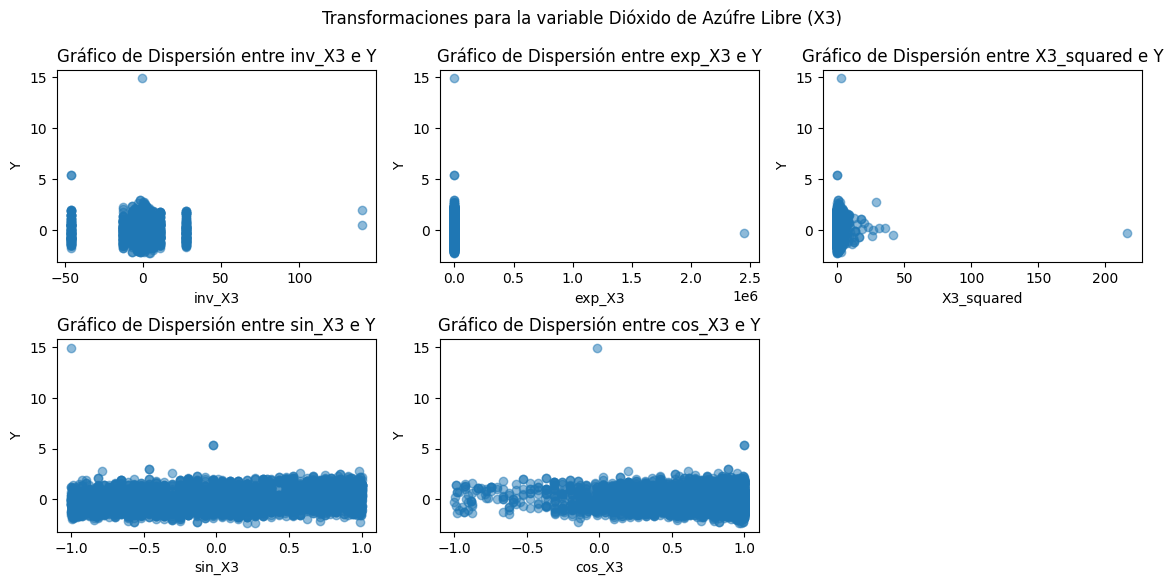

In [71]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 6))  # Ajustar el tamaño para acomodar los gráficos
plt.suptitle("Transformaciones para la variable Dióxido de Azúfre Libre (X3)")
plt.subplots_adjust(hspace=0.4)  # Añadir espacio vertical entre gráficos si es necesario

# Subplot 1: Transformación inversa
plt.subplot(2, 3, 1)
plt.scatter(df_scaled['inv_X3'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('inv_X3')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre inv_X3 e Y')

# Subplot 2: Transformación exponencial
plt.subplot(2, 3, 2)
plt.scatter(df_scaled['exp_X3'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('exp_X3')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre exp_X3 e Y')

# Subplot 3: Transformación cuadratica
plt.subplot(2, 3, 3)
plt.scatter(df_scaled['X3_squared'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('X3_squared')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre X3_squared e Y')

# Subplot 4: Transformación seno
plt.subplot(2, 3, 4)
plt.scatter(df_scaled['sin_X3'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('sin_X3')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre sin_X3 e Y')

# Subplot 5: Transformación coseno
plt.subplot(2, 3, 5)
plt.scatter(df_scaled['cos_X3'], df_scaled['Densidad'], alpha=0.5)
plt.xlabel('cos_X3')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión entre cos_X3 e Y')

De acuerdo a las graficas de dispersión para las variables de "Dióxido de Azúfre Libre" y "Ácido Cítrico" podemos concluir que no aplica ninguna de las transformaciones propuestas, por lo tanto no se proponer realizar ninguna tranformación.

# Ejercicio 4

Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar
si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno
de inversión. El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables
que representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades)
de un producto en un mercado específico: - TV: Gasto en publicidad en televisión. - Radio: Gasto
en publicidad en radio. - Newspaper: Gasto en publicidad en periódicos. - Sales: Número de
unidades vendidas (en miles)

## Primera parte

Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

In [72]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [73]:
# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis_Cuantitativo/AnalisisCuantitativo_Taller1/publicidad.csv')

In [74]:
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1 230.10  37.80      69.20  22.10
1             2  44.50  39.30      45.10  10.40
2             3  17.20  45.90      69.30   9.30
3             4 151.50  41.30      58.50  18.50
4             5 180.80  10.80      58.40  12.90
..          ...    ...    ...        ...    ...
195         196  38.20   3.70      13.80   7.60
196         197  94.20   4.90       8.10   9.70
197         198 177.00   9.30       6.40  12.80
198         199 283.60  42.00      66.20  25.50
199         200 232.10   8.60       8.70  13.40

[200 rows x 5 columns]

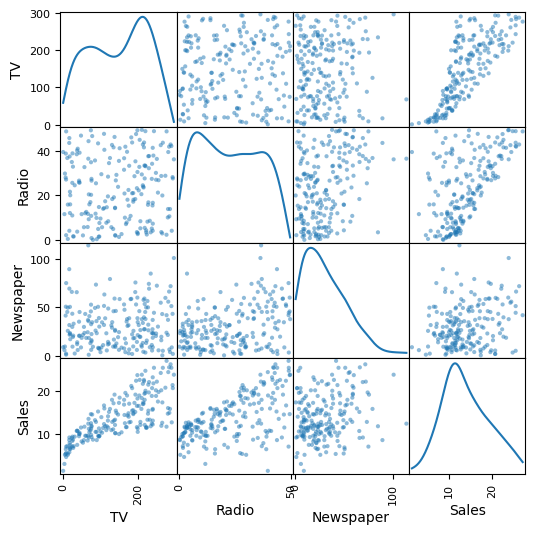

In [75]:
# Crear la matriz de dispersión
scatter_matrix(df[['TV', 'Radio', 'Newspaper', 'Sales']], alpha=0.5, figsize=(6, 6), diagonal='kde')
plt.show()

La función scatter_matrix() genera una matriz de gráficos de dispersión que permite comparar visualmente todas las variables de un DataFrame entre sí. En el contexto del ejemplo, se utiliza para analizar la relación entre las ventas (Sales) y los diferentes gastos publicitarios (TV, Radio, Newspaper). Esta visualización es útil para detectar tendencias o posibles correlaciones entre las variables, como si existe una relación lineal entre los gastos en publicidad y las ventas.

## Segunda parte

Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor y represente estas correlaciones. Interprete las estructuras de dependencia encontradas

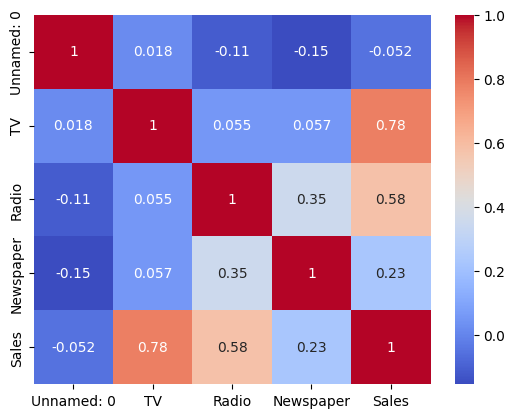

In [76]:
# Calcular la matriz de correlación
corr_matrix = df.corr(method='pearson')

# Crear un mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


*   TV y Sales (0.78): Existe una fuerte correlación positiva entre el gasto en TV y las ventas, lo que indica que al aumentar el gasto en TV, las ventas también suben de manera significativa.

*  Radio y Sales (0.58): La correlación es moderada, sugiriendo que el gasto en Radio también influye en las ventas, pero con menos fuerza que TV.

*  Newspaper y Sales (0.23): La correlación es muy débil, lo que significa que el gasto en Newspaper tiene poca relación con el aumento en ventas.

Dado que la correlación entre TV y Sales es la más alta (0.8), es razonable pensar que el gasto en TV será el mejor predictor de las ventas en un modelo de regresión lineal simple. Esta fuerte correlación sugiere que los cambios en el gasto publicitario en TV tienen un impacto significativo en las ventas, por lo que al usar esta variable en el modelo, es probable que se obtenga un buen ajuste y predicciones más precisas en comparación con otras variables publicitarias como Radio o Newspaper.


## Tercera parte

Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o
“Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de
regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente
de determinación R2? ¿Cómo se interpreta este valor?

In [77]:
# Definir la variable independiente (Variable elegida, TV)
X = df['TV']
y = df['Sales']

# Ajustar el modelo
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        00:47:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

**Interpretación:**

*  Intercepto (7.032): Este valor representa las ventas esperadas (en miles de unidades) cuando no se realiza ninguna inversión en publicidad en TV. Es decir, si el gasto en TV fuera cero, la empresa aún vendería aproximadamente 7.03 mil unidades. Este es el nivel base de ventas sin inversión publicitaria en televisión.

*  Pendiente (0.047): Este coeficiente indica que por cada mil dólares adicionales invertidos en publicidad en TV, las ventas aumentan en aproximadamente 47 unidades (en miles). En otras palabras, invertir más en publicidad televisiva tiene un impacto positivo y significativo en el crecimiento de las ventas.

*  Valor del R² (0.6119): Este valor indica que el 61.19% de la variabilidad en las ventas es explicada por el gasto en publicidad en TV. Esto sugiere que existe una relación considerablemente fuerte entre la inversión en TV y el nivel de ventas.

El 38.81% no explicado: El restante 38.81% de la variabilidad en las ventas no está explicado por el gasto en TV. Esto podría deberse a otros factores, como el gasto en Radio, Newspaper, u otras variables no incluidas en el modelo.

## Cuarta parte

Realiza una predicción del retorno de inversión esperado cuando se realizan 5 anuncios por
el canal de la variable escogida en el ítem anterior. ¿Cuál es el intervalo de confianza del
95 % para la predicción?

In [81]:
# Predicción para 5 anuncios de TV
pred_5 = modelo.predict([[1, 5]])
print(f"Predicción para 5 anuncios: {pred_5}")

Predicción para 5 anuncios: [7.27027675]


*  Predicción (7.27): Si la empresa invierte 5 mil dólares en publicidad en TV, se espera que las ventas alcancen aproximadamente 7.27 mil unidades (7270 productos vendidos).

*  En esta estimación se muestra el impacto de la inversión en TV, mostrando que, según el modelo, una inversión de 5 mil dólares en anuncios debería generar un incremento de ventas significativo, cercano a 7270 productos

In [82]:
# Calcular el intervalo de confianza del 95% para la predicción
y_predicha = modelo.predict(X)
residuales = y - y_predicha
std_error = np.std(residuales)
intervalo = 1.96 * std_error / np.sqrt(len(X))

print(f"Intervalo de confianza: {pred_5 - intervalo} a {pred_5 + intervalo}")

Intervalo de confianza: [6.82091383] a [7.71963968]


*  El intervalo de confianza para una inversión de 5 mil dólares en TV indica que las ventas estarán entre 6.82 y 7.72 mil unidades con un 95% de confianza. El intervalo estrecho sugiere que el modelo proporciona una predicción precisa para esta inversión.